In [1487]:
import pandas as pd

df2021 = pd.read_csv('../../data/raw/world-happiness-report-2021.csv')
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Cleaning and Adding

In [1488]:
# Dataframe containing ladder scores of 2020 and 2021

df2020 = pd.read_csv('../../data/raw/world-happiness-report-2020.csv')
df = df2021.rename(columns={'Ladder score':'Ladder score 2021'})
df.insert(3,'Ladder score 2020',df2020['Ladder score'])
df.insert(4,'Ladder score difference (2021 subtracted by 2020)',df['Ladder score 2021'] - df['Ladder score 2020'])
temp = df['Standard error of ladder score']
df = df.drop('Standard error of ladder score',axis='columns')
df.insert(3,'Standard error of ladder score 2021',temp)
df.insert(5,'Standard error of ladder score 2020',df2020['Standard error of ladder score'])

In [1489]:
# Dropping Explained By: Columns, upperwhisker and lowerwhisker
df = df.loc[:,'Country name':'Perceptions of corruption'].drop(['upperwhisker','lowerwhisker'], axis='columns')
df

,Country name,Regional indicator,Ladder score 2021,Standard error of ladder score 2021,Ladder score 2020,Standard error of ladder score 2020,Ladder score difference (2021 subtracted by 2020),Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,7.8087,0.031156,0.0333,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,7.6456,0.033492,-0.0256,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,0.036,7.5599,0.035014,0.0111,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,0.059,7.5045,0.059616,0.0495,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,0.027,7.4880,0.034837,-0.0240,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.5380,0.070261,-0.0260,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.5274,0.054158,-0.0604,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.4789,0.060543,-0.0639,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.4762,0.063210,-0.3312,7.943,0.750,56.201,0.677,-0.047,0.821


In [1490]:
# Dropping any row that has null
print('Amount of rows before dropping:', len(df.index))
df = df.dropna(axis='rows', how='any')
print('Amount of rows after dropping:',len(df.index))

# No null values within our data

Amount of rows before dropping: 149
Amount of rows after dropping: 149


## Method Chain

In [1491]:
def load_and_process_shaheer(urlOrPathCSV1, urlOrPathCSV2):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = pd.read_csv(urlOrPathCSV1).dropna(axis='rows',how='any')
          

    # Method Chain 2 (drop columns, rename columns and do processing)

    df1 = df1.loc[:,'Country name':'Perceptions of corruption'].drop(['upperwhisker','lowerwhisker'], axis='columns').rename(columns={'Ladder score':'Ladder score 2021'})

    # Make sure to return the latest dataframe

  # Method Chain 3 (Add new columns and reorder)
    df2 = pd.read_csv(urlOrPathCSV2)
    df1.insert(3,'Ladder score 2020',df2['Ladder score'])
    df1.insert(4,'Ladder score difference (2021 subtracted by 2020)',df1['Ladder score 2021'] - df1['Ladder score 2020'])
    temp = df1['Standard error of ladder score']
    df1 = df1.drop('Standard error of ladder score',axis='columns')
    df1.insert(3,'Standard error of ladder score 2021',temp)
    df1.insert(5,'Standard error of ladder score 2020',df2['Standard error of ladder score'])
    
    return df1

In [1492]:
load_and_process_shaheer('../../data/raw/world-happiness-report-2021.csv','../../data/raw/world-happiness-report-2020.csv')

,Country name,Regional indicator,Ladder score 2021,Standard error of ladder score 2021,Ladder score 2020,Standard error of ladder score 2020,Ladder score difference (2021 subtracted by 2020),Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,7.8087,0.031156,0.0333,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,7.6456,0.033492,-0.0256,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,0.036,7.5599,0.035014,0.0111,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,0.059,7.5045,0.059616,0.0495,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,0.027,7.4880,0.034837,-0.0240,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.5380,0.070261,-0.0260,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.5274,0.054158,-0.0604,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.4789,0.060543,-0.0639,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.4762,0.063210,-0.3312,7.943,0.750,56.201,0.677,-0.047,0.821


In [1493]:
import seaborn as sns
import matplotlib.pyplot as p

<AxesSubplot:title={'center':'Boxplot of Ladder Score for Regions in 2020'}, xlabel='Ladder score 2020', ylabel='Regional indicator'>

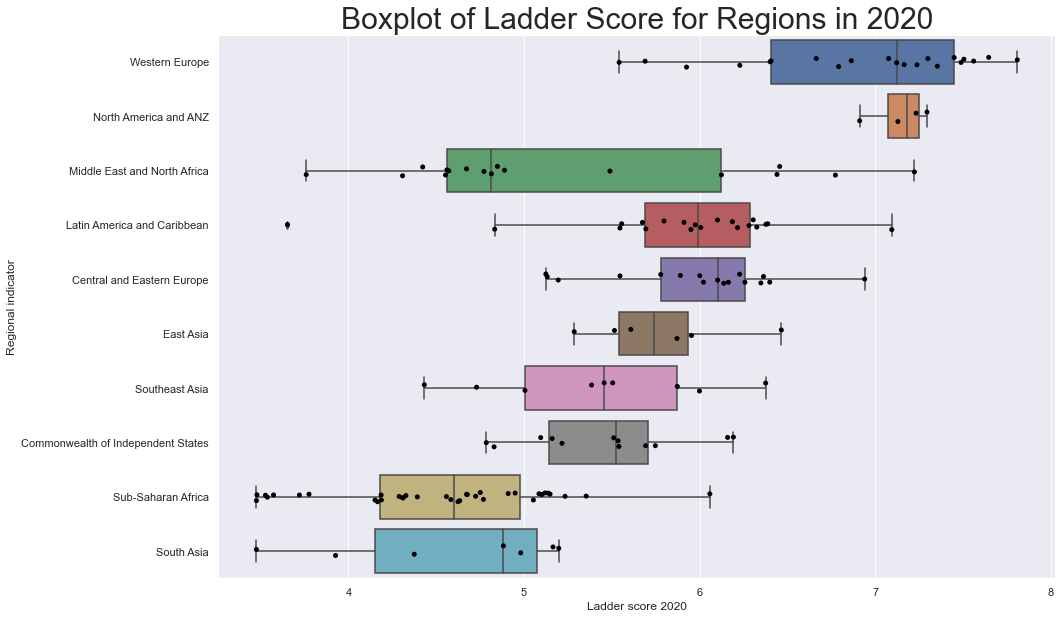

In [1494]:

sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(data=df,x=df['Ladder score 2020'],y=df['Regional indicator']).set_title('Boxplot of Ladder Score for Regions in 2020',fontsize=30)
sns.stripplot(data = df, x=df['Ladder score 2020'],y=df['Regional indicator'],color = 'black')

<AxesSubplot:title={'center':'Boxplot of Ladder Score for Regions in 2021'}, xlabel='Ladder score 2021', ylabel='Regional indicator'>

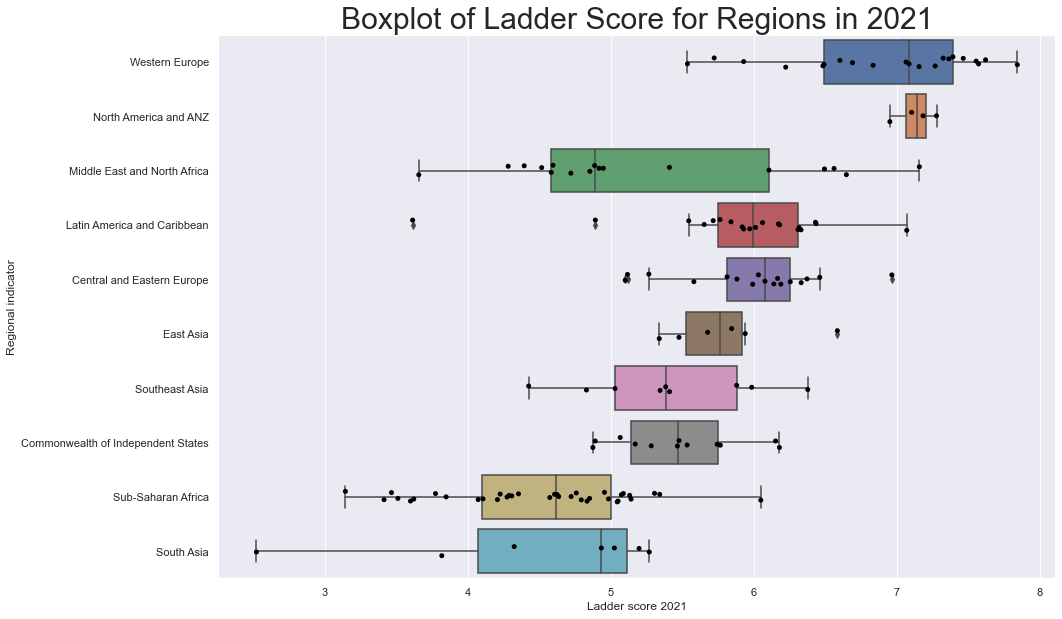

In [1495]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(data=df,x=df['Ladder score 2021'],y=df['Regional indicator']).set_title('Boxplot of Ladder Score for Regions in 2021',fontsize=30)
sns.stripplot(data = df, x=df['Ladder score 2021'],y=df['Regional indicator'],color = 'black')

In [1496]:
# Method for returning dataframe with countries in specific region and their respective ladder score for the year specified.
def grabRegionalCountriesAndLadderScoreDifference(df, region:str, rows:int):
    dfT = df['Regional indicator']
    dfT = dfT.to_frame()
    dfT = dfT.drop([i for i in range(0,rows) if dfT.iloc[i].item()!=region],axis='rows')
    lst = list(dfT.index.values)
    dfT = df['Ladder score difference (2021 subtracted by 2020)']
    dfT = dfT.to_frame()
    dfT.insert(0,'Country name',df['Country name'])
    dfT = dfT.drop([i for i in range(0,rows) if i not in lst], axis = 'rows')
    return dfT

In [1497]:
# Method for getting the mean of ladder score difference for each region
def meanByRegion(rdf):
    lst = list(rdf['Ladder score difference (2021 subtracted by 2020)'])
    count = len(list(rdf.index.values))
    return sum(lst)/count

In [1498]:
# Graphing average Ladder Score Difference By Region
    # This will alow us to see which regions have dealt with the pandemic, in terms of happiness, better or worse

Text(0.5, 1.0, 'Change in Average Ladder Score by Region')

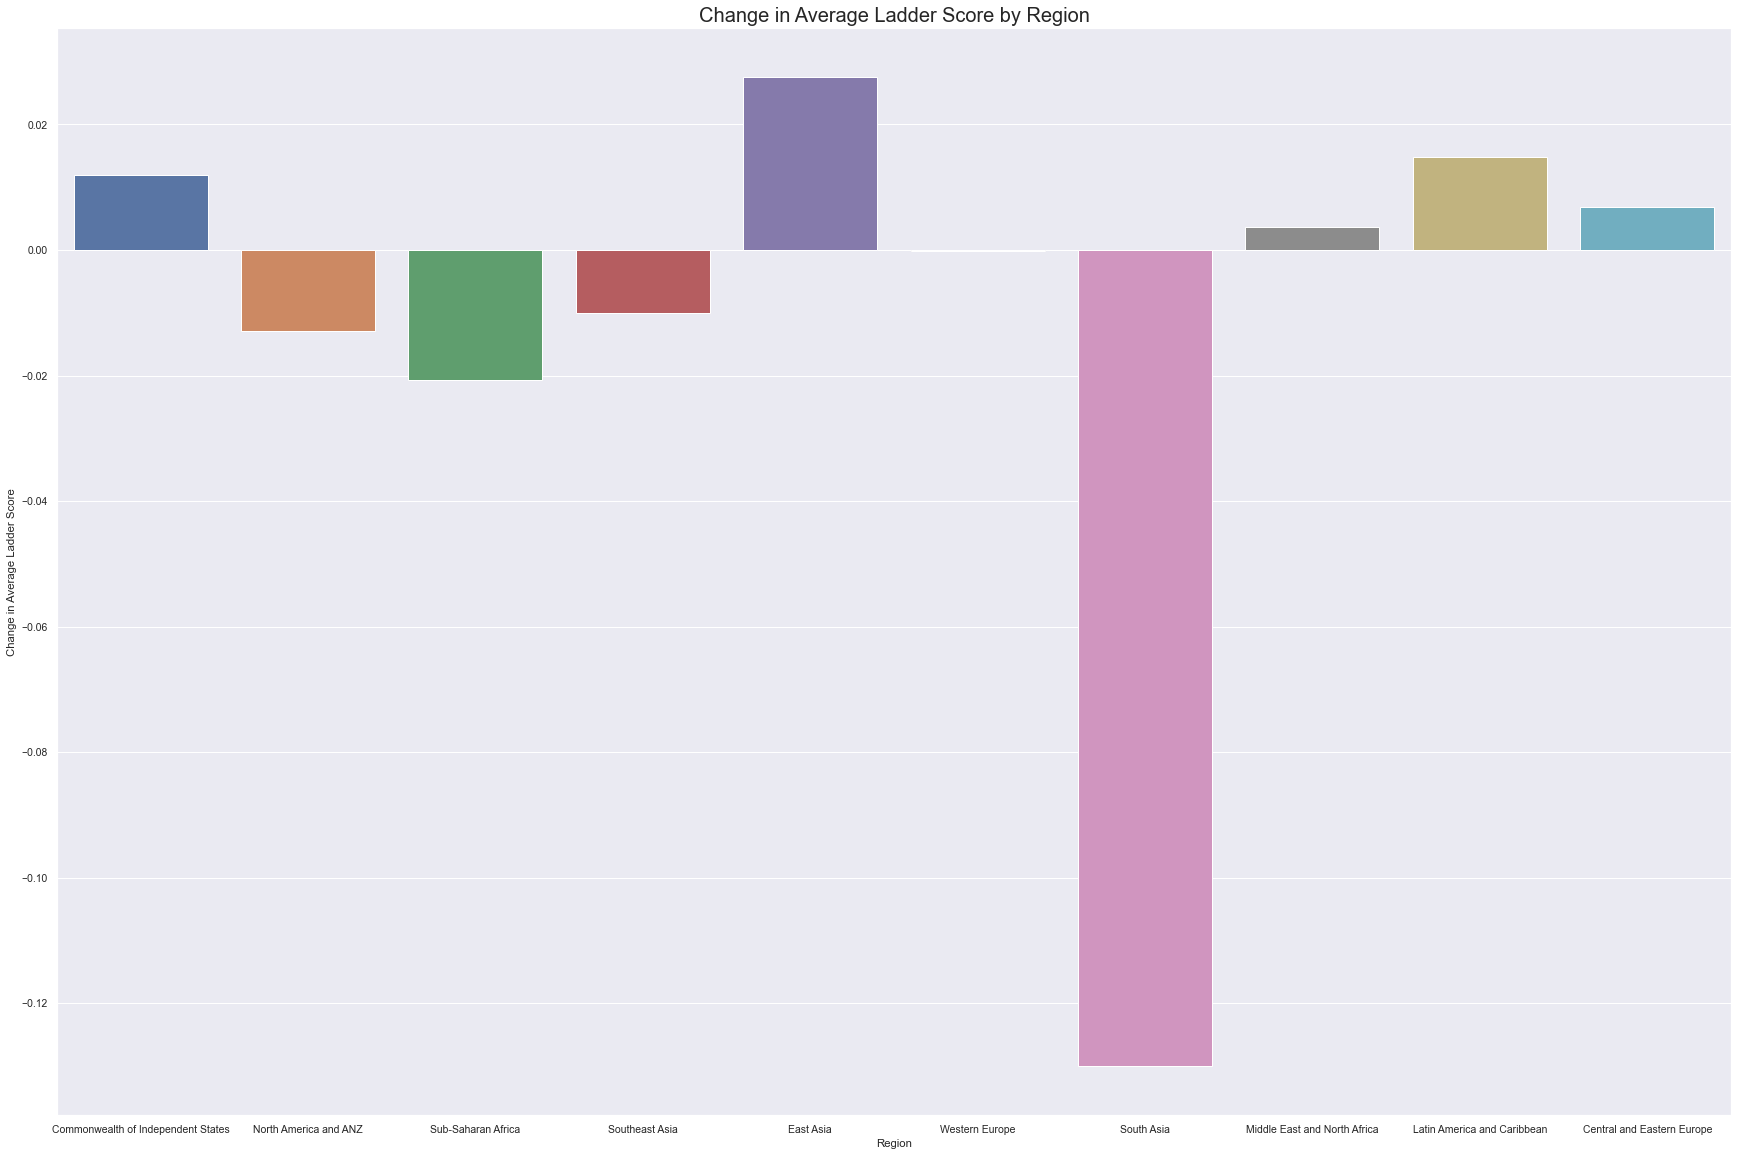

In [1499]:
# Regional Average of Ladder Score Difference Graph
s = set(df['Regional indicator'])
l = list(s)

lstOfMean = []
for i in l:
    dfT = grabRegionalCountriesAndLadderScoreDifference(df,i,149)
    lstOfMean.append(meanByRegion(dfT))
d = {'Region':l,'Change in Average Ladder Score':lstOfMean}

dfRA = pd.DataFrame(d)

sns.set(rc={'figure.figsize':(30,20)},font_scale=0.95)
sns.barplot(data=dfRA,x='Region',y='Change in Average Ladder Score').set_title('Change in Average Ladder Score by Region',fontsize=20)

    

    

In [1500]:
# From the graph, East Asia became happier since beginning of the pandemic. However, South Asia, for example, became less happier. But why? What factors allowed East Asia to alleviate their happiness?

In [1501]:
def meanOfColumn(rdf,column):
    lst = list(rdf[column])
    count = len(list(rdf.index.values))
    return sum(lst)/count



In [1502]:
def grabRegionalCountriesAndColumn(df, region:str, rows:int, column:str):
    dfT = df['Regional indicator']
    dfT = dfT.to_frame()
    dfT = dfT.drop([i for i in range(0,rows) if dfT.iloc[i].item()!=region],axis='rows')
    lst = list(dfT.index.values)
    dfT = df[column]
    dfT = dfT.to_frame()
    dfT.insert(0,'Country name',df['Country name'])
    dfT = dfT.drop([i for i in range(0,rows) if i not in lst], axis = 'rows')
    return dfT

In [1503]:
def meanByRegionDataframe(df,column):
    s = set(df['Regional indicator'])
    l = list(s)

    lstOfMean = []
    for i in l:
        dfT = grabRegionalCountriesAndColumn(df,i,149,column)
        lstOfMean.append(meanOfColumn(dfT,column))
    d = {'Region':l,'Average of '+column:lstOfMean}

    dfRA = pd.DataFrame(d)
    return dfRA


In [1504]:
def barPlot1(df,column):
    temp = meanByRegionDataframe(df,column)
    sns.set(rc={'figure.figsize':(30,20)},font_scale=0.95)
    sns.barplot(data=temp,x='Region',y='Average of '+column).set_title('Average of '+column+' by Region',fontsize=20)
def barPlot2(df,column):
    temp = df
    sns.set(rc={'figure.figsize':(30,20)},font_scale=0.95)
    sns.barplot(data=temp,x='Region',y='Change in Average of '+column).set_title('Change in Average of '+column+' by Region',fontsize=20)
    

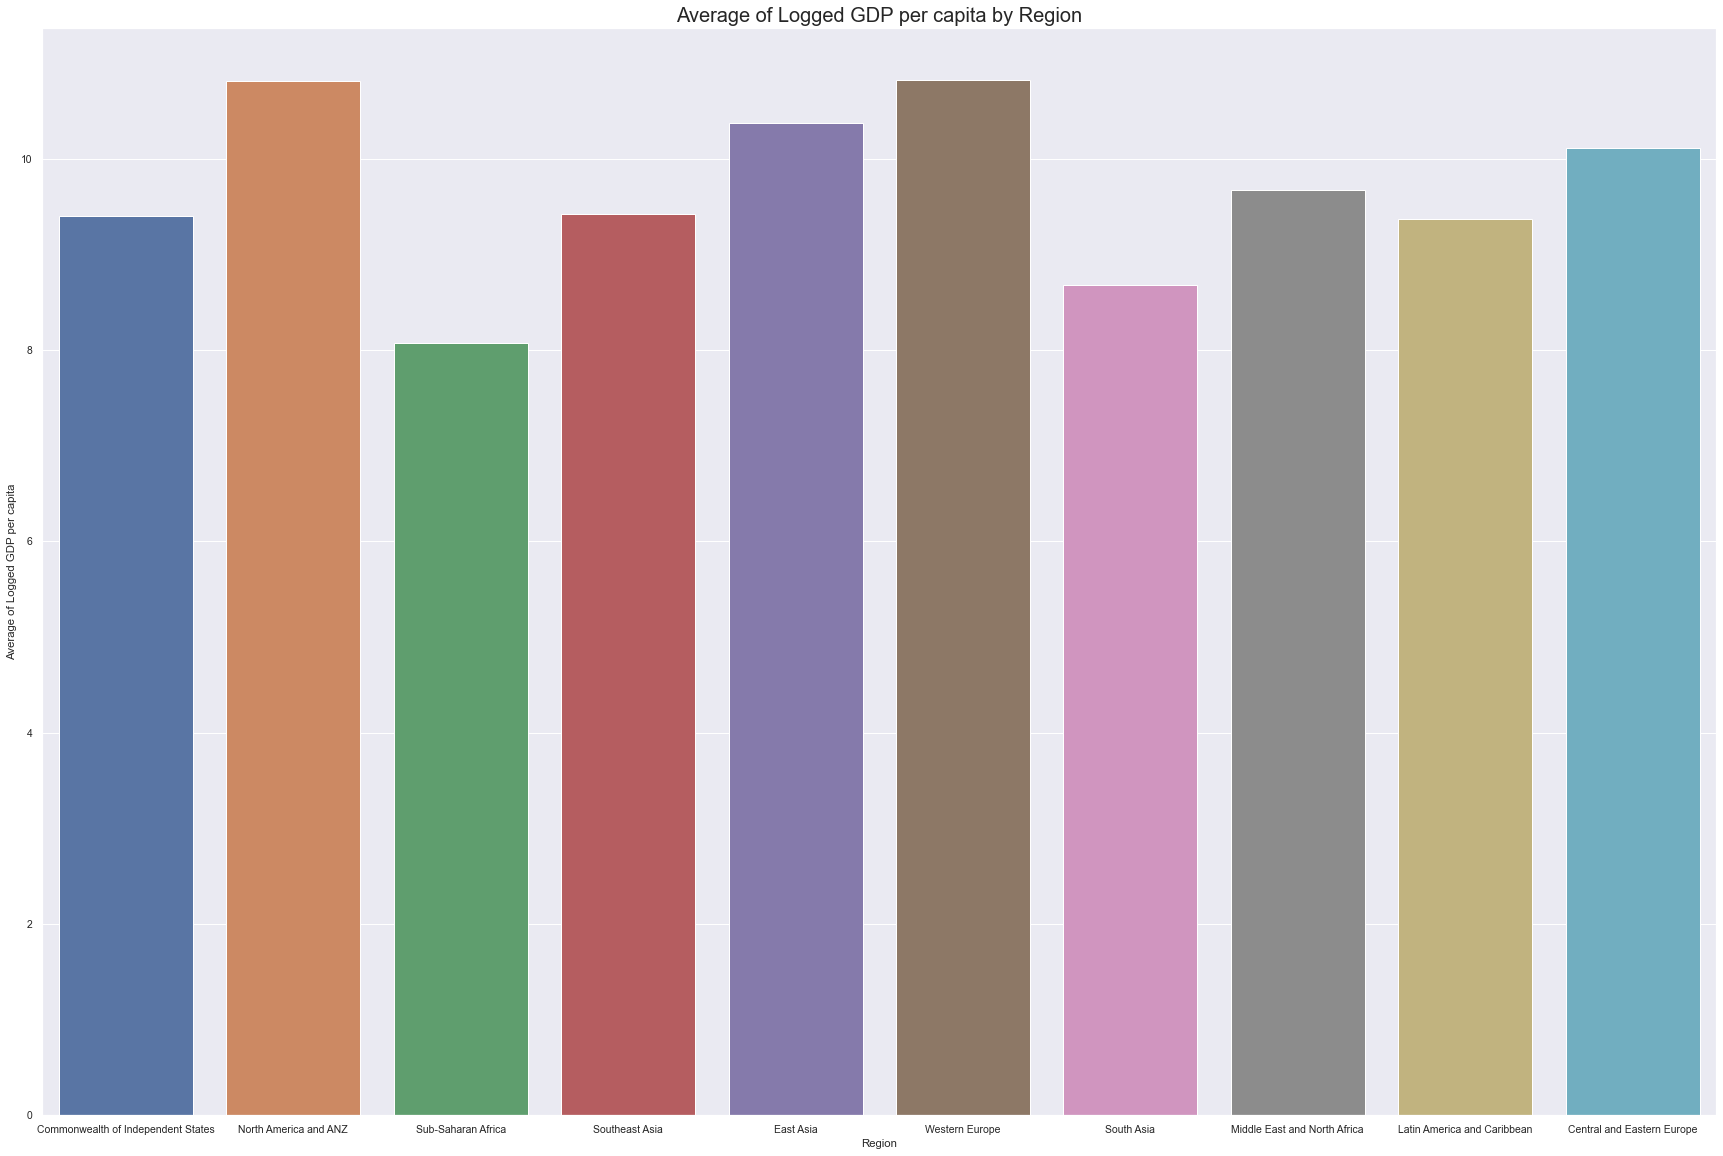

In [1505]:
# Firstly, I will see which regions had the greater GDP in 2021
barPlot1(df,'Logged GDP per capita')

In [1506]:
# Even though East Asia had a lesser average GDP, they were still much happier than Western Europe. Therefore, a higher GDP does not make a region, or country, happier.

In [1507]:
# I will look at the change in GDP from 2020 to 2021

In [1508]:
def changeInColumnByYear(df1,df0,column):
    df2021T = meanByRegionDataframe(df1,column)
    df2020T = meanByRegionDataframe(df0,column)
    dfC = df2021T['Region']
    dfC = dfC.to_frame()
    dfC.insert(1,'Change in Average of '+column, df2021T['Average of '+column] - df2020T['Average of '+column])
    return dfC

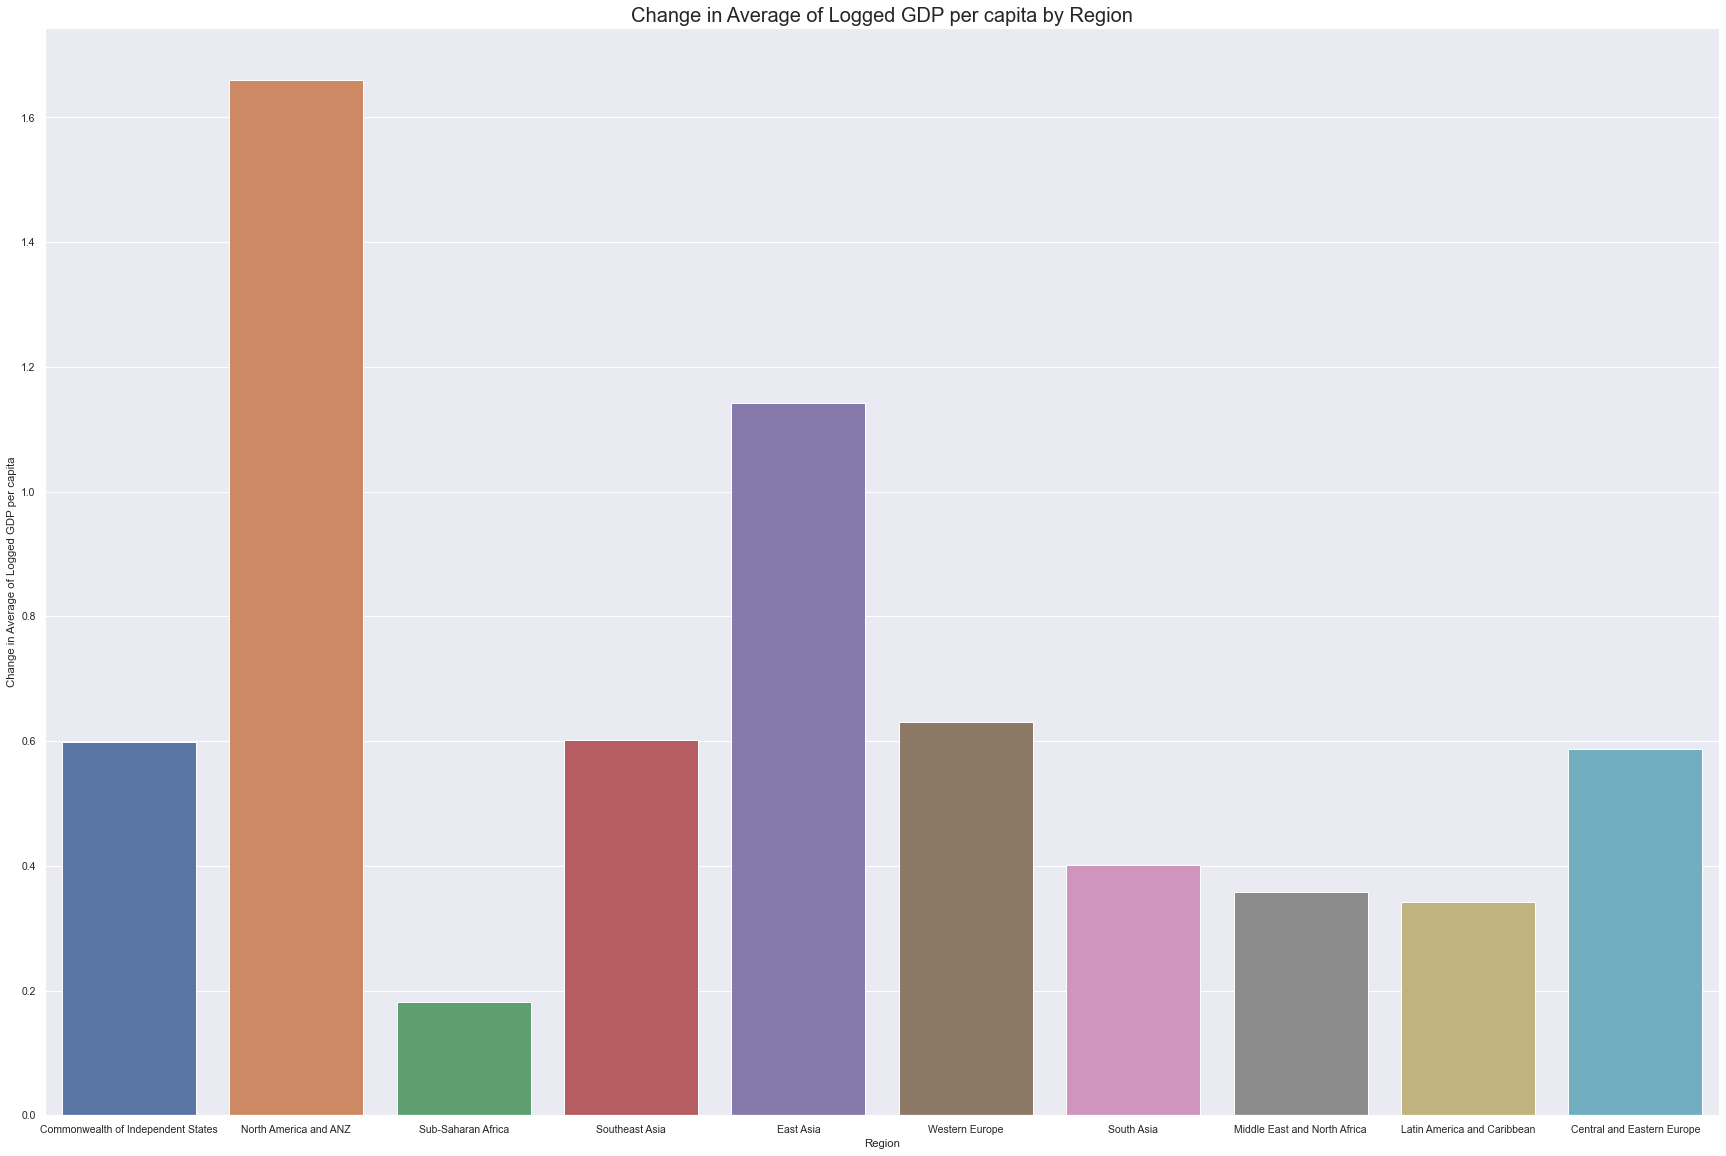

In [1509]:
barPlot2(changeInColumnByYear(df2021,df2020,'Logged GDP per capita'),'Logged GDP per capita')

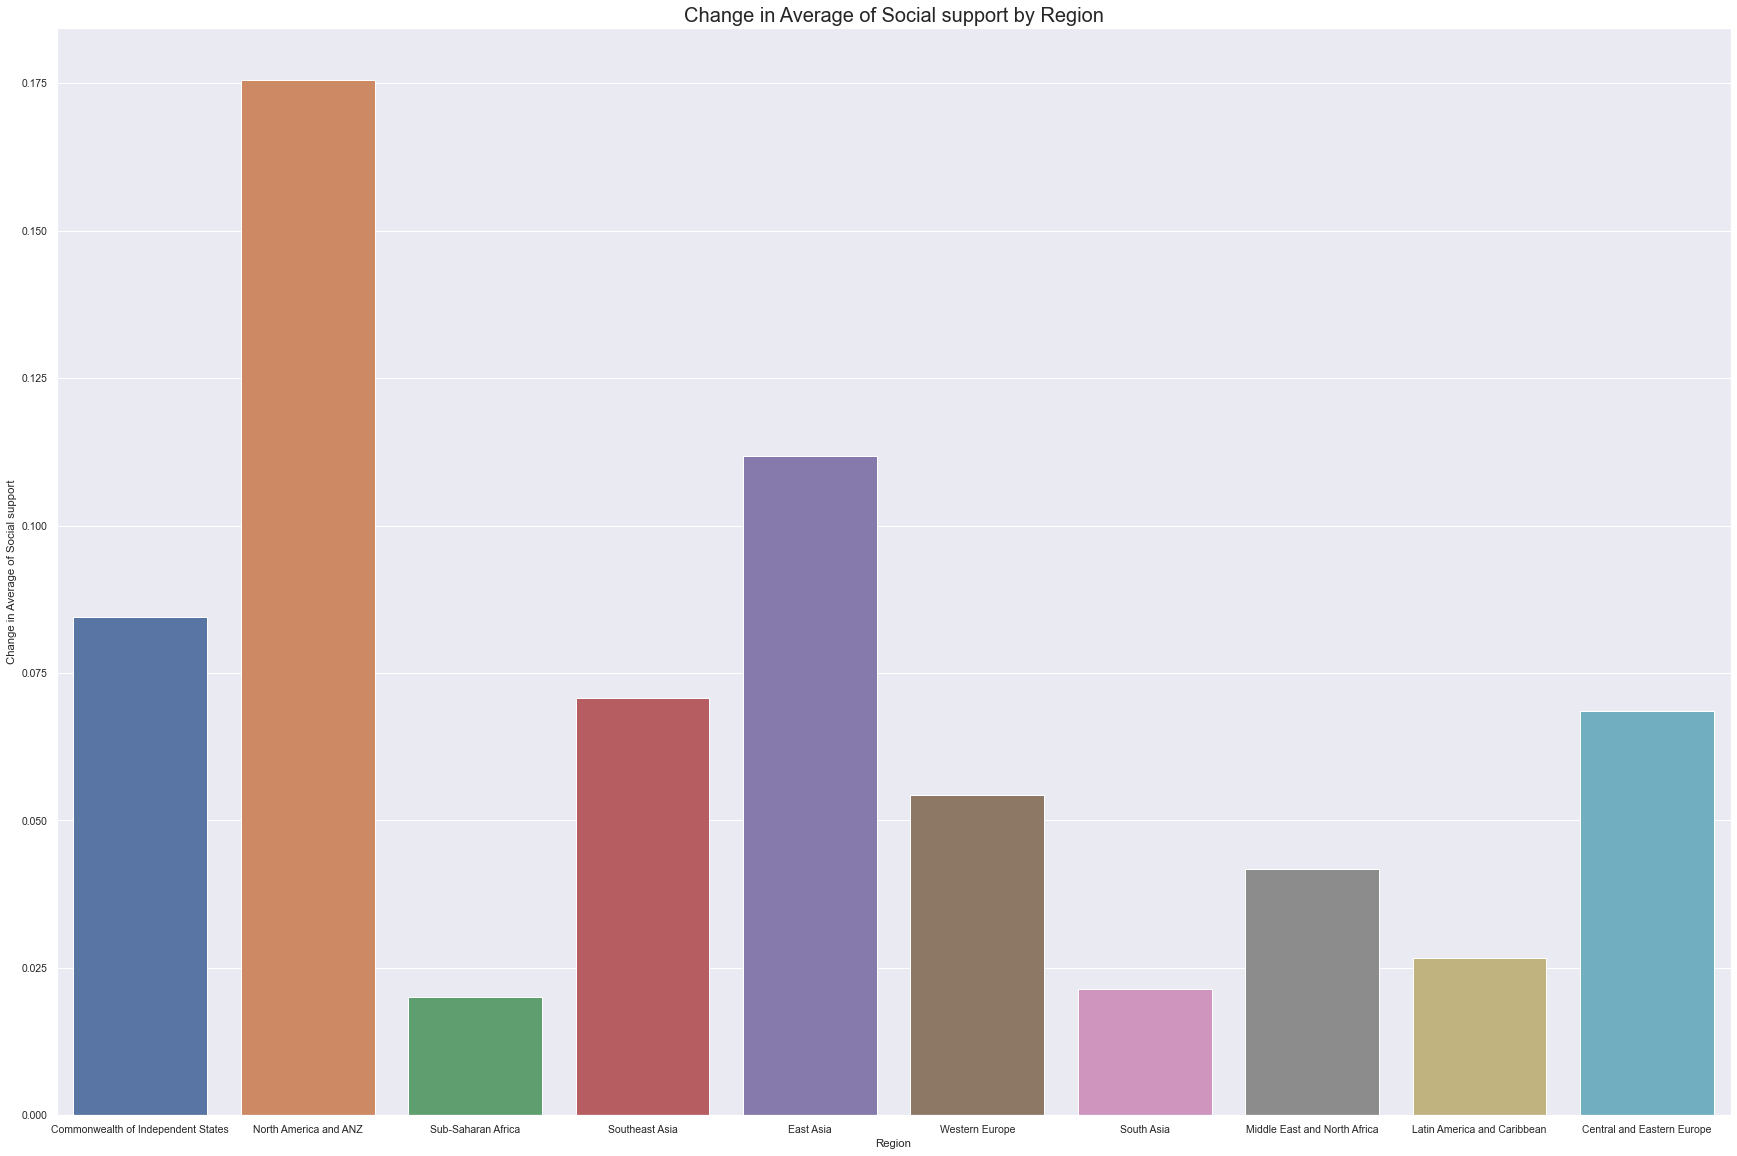

In [1510]:
barPlot2(changeInColumnByYear(df2021,df2020,'Social support'),'Social support')

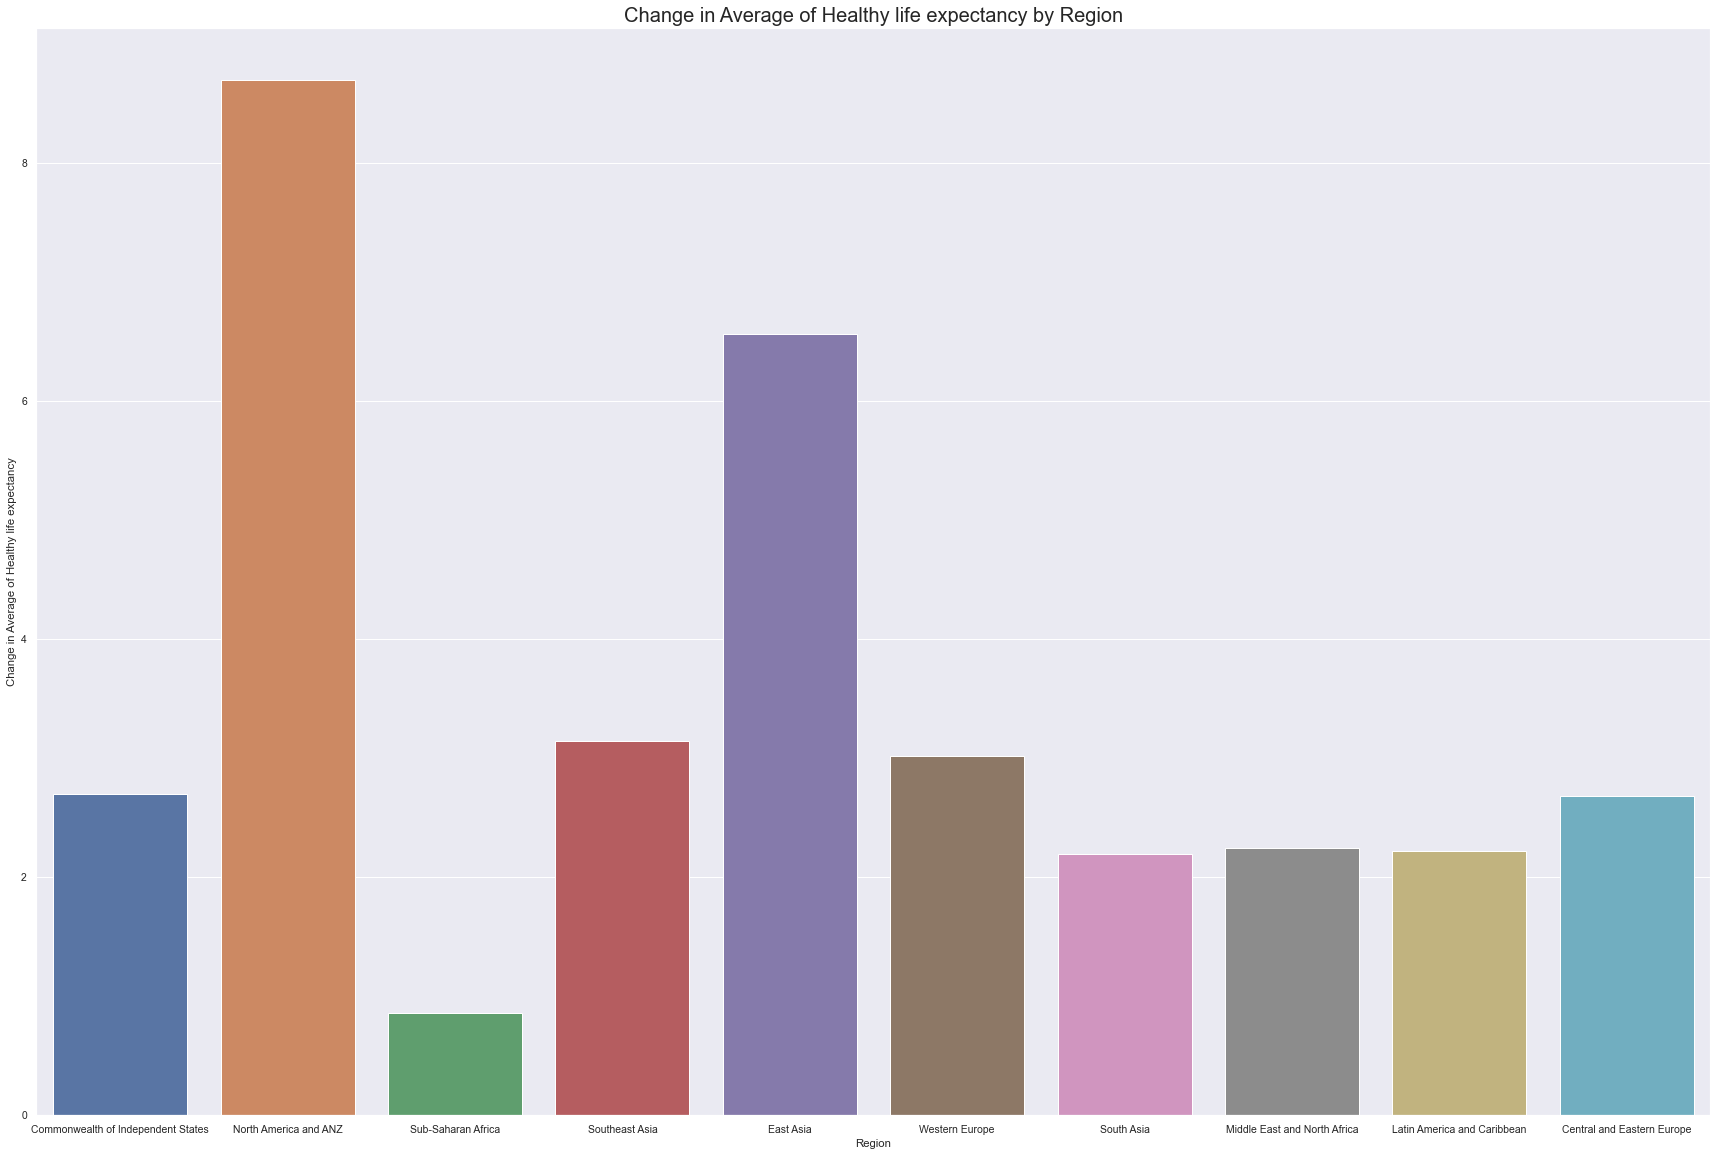

In [1511]:
barPlot2(changeInColumnByYear(df2021,df2020,'Healthy life expectancy'),'Healthy life expectancy')

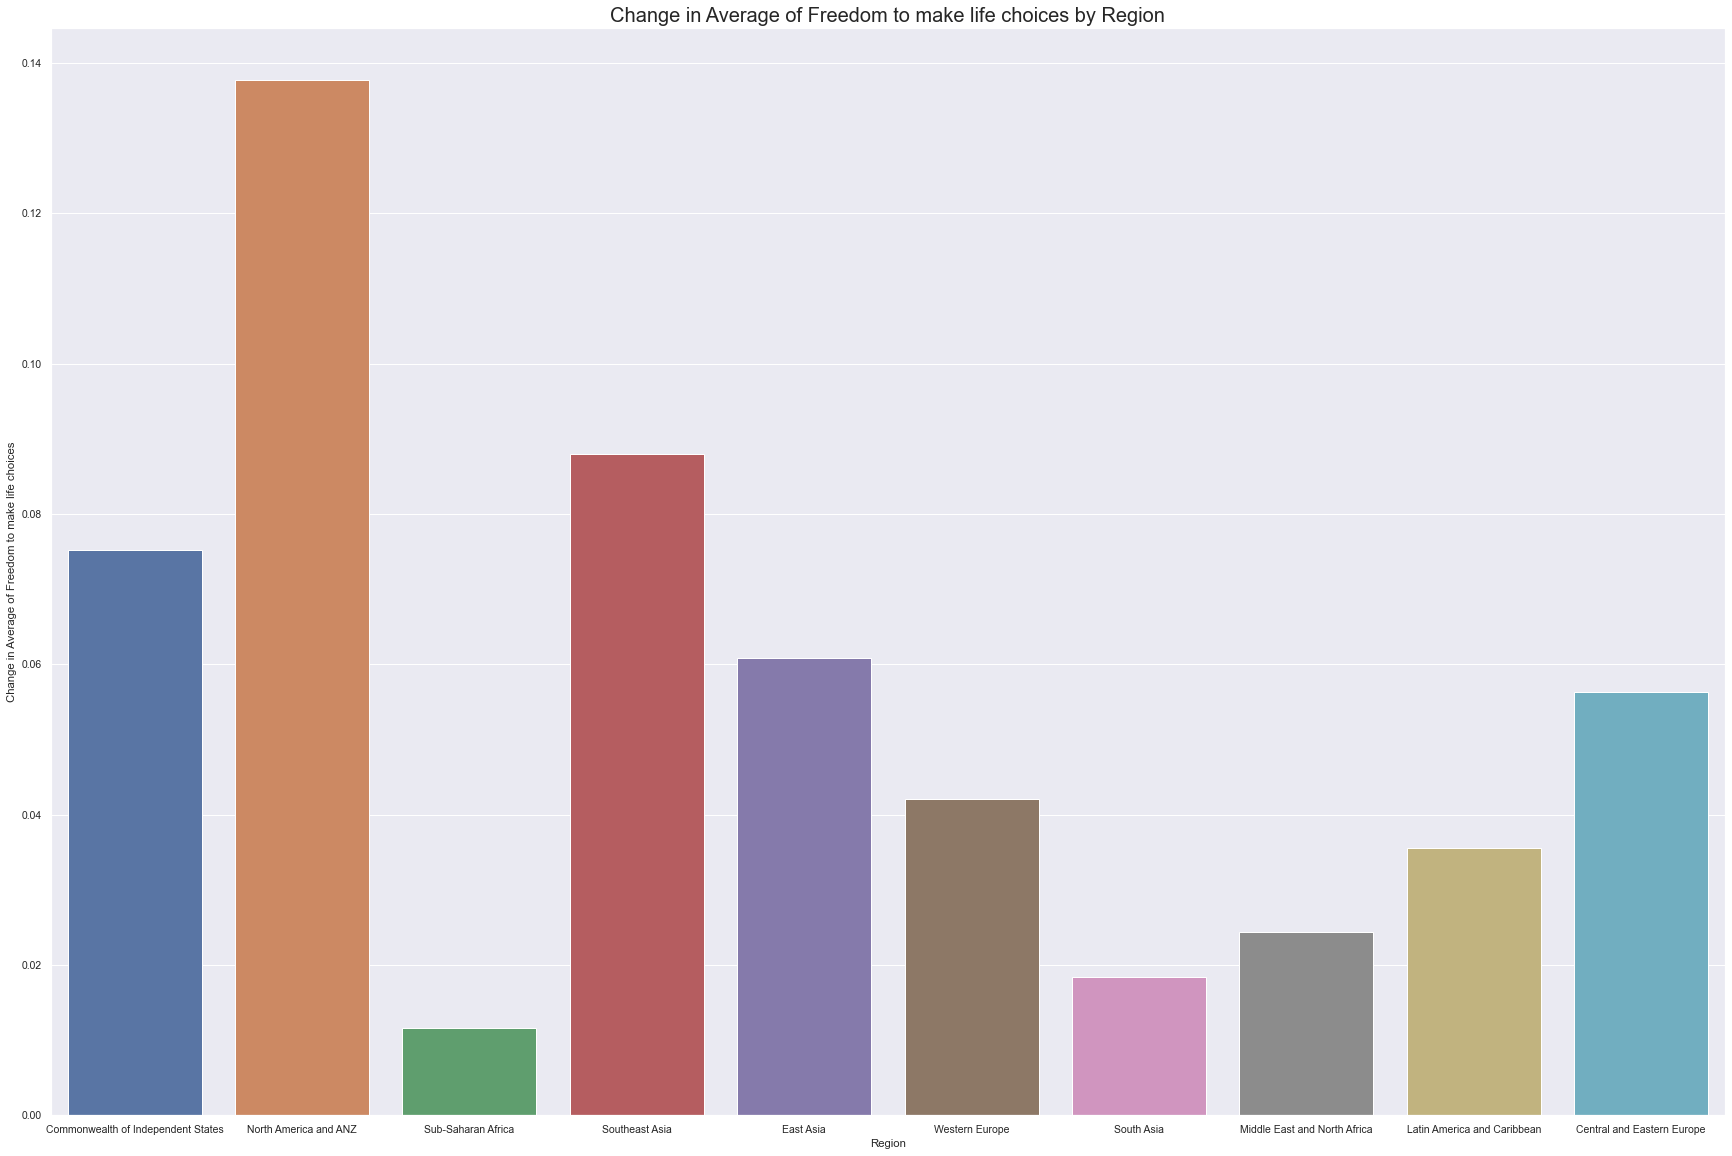

In [1512]:
barPlot2(changeInColumnByYear(df2021,df2020,'Freedom to make life choices'),'Freedom to make life choices')

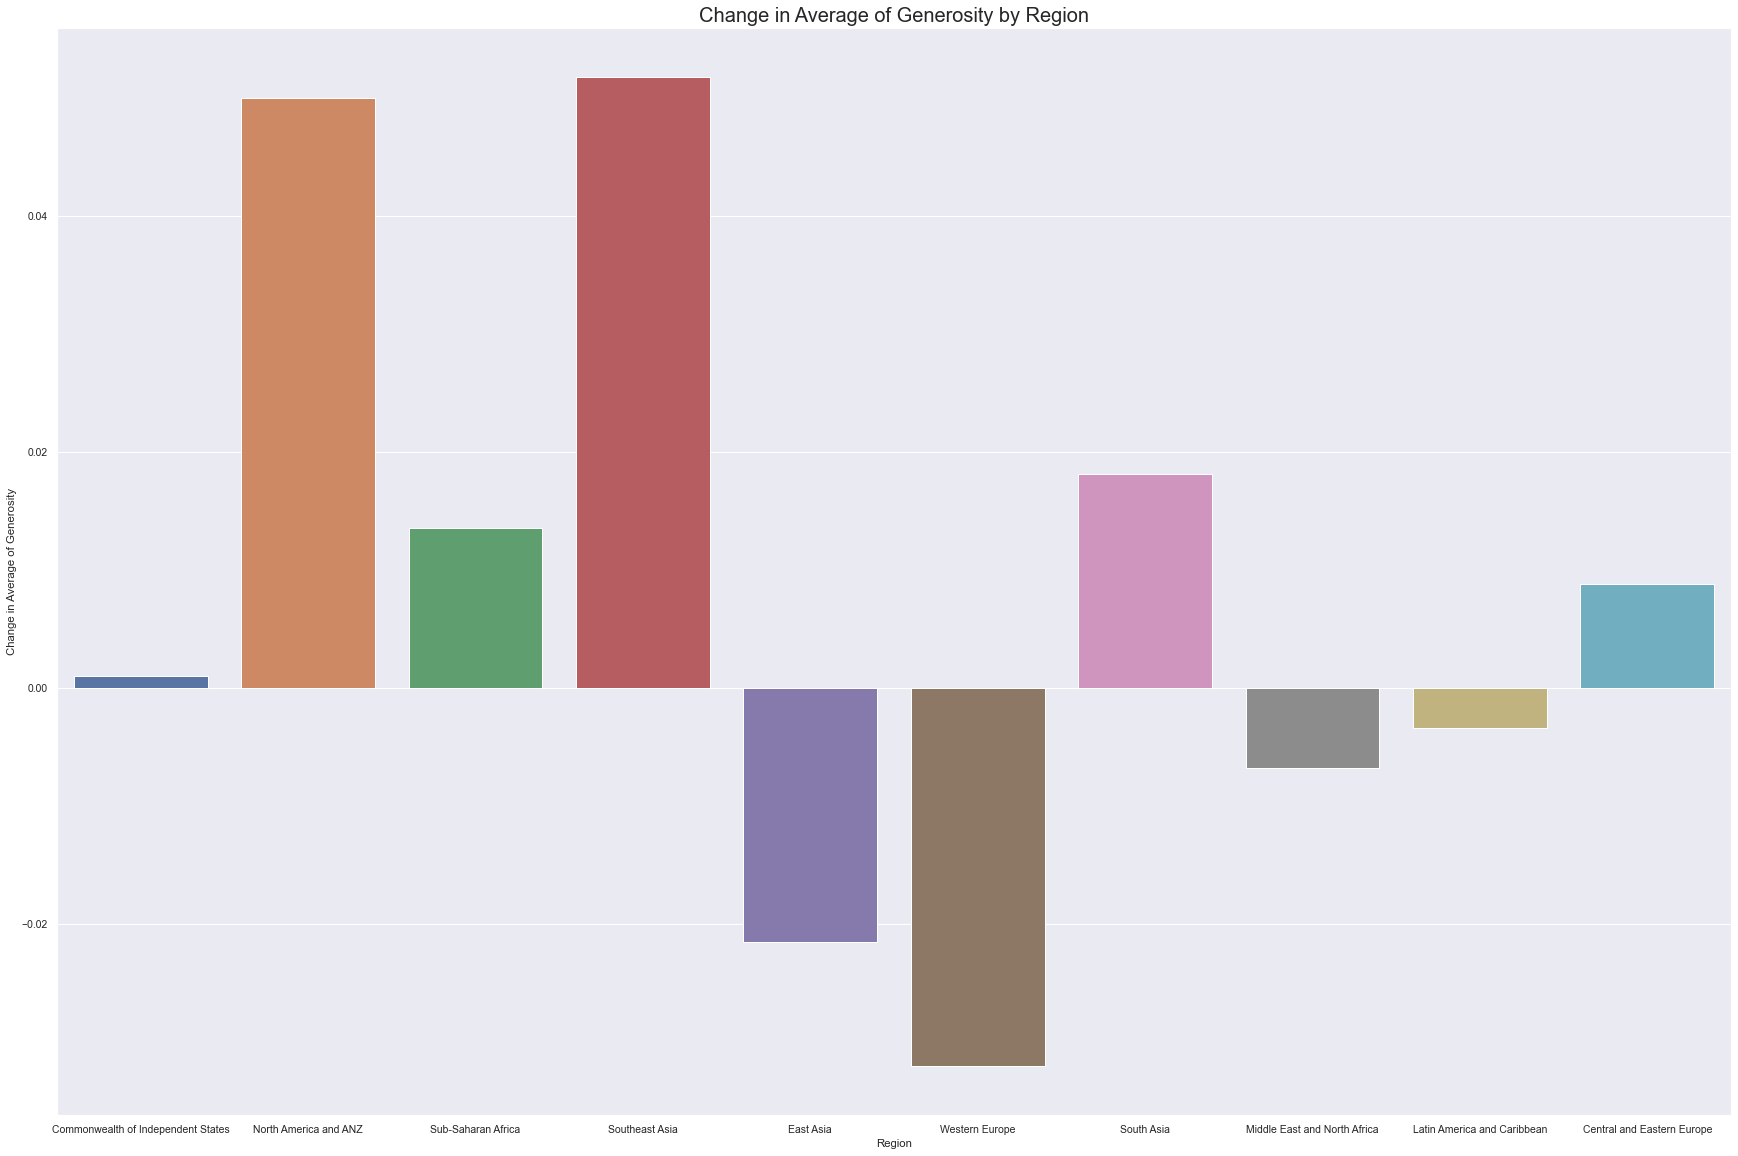

In [1513]:
barPlot2(changeInColumnByYear(df2021,df2020,'Generosity'),'Generosity')

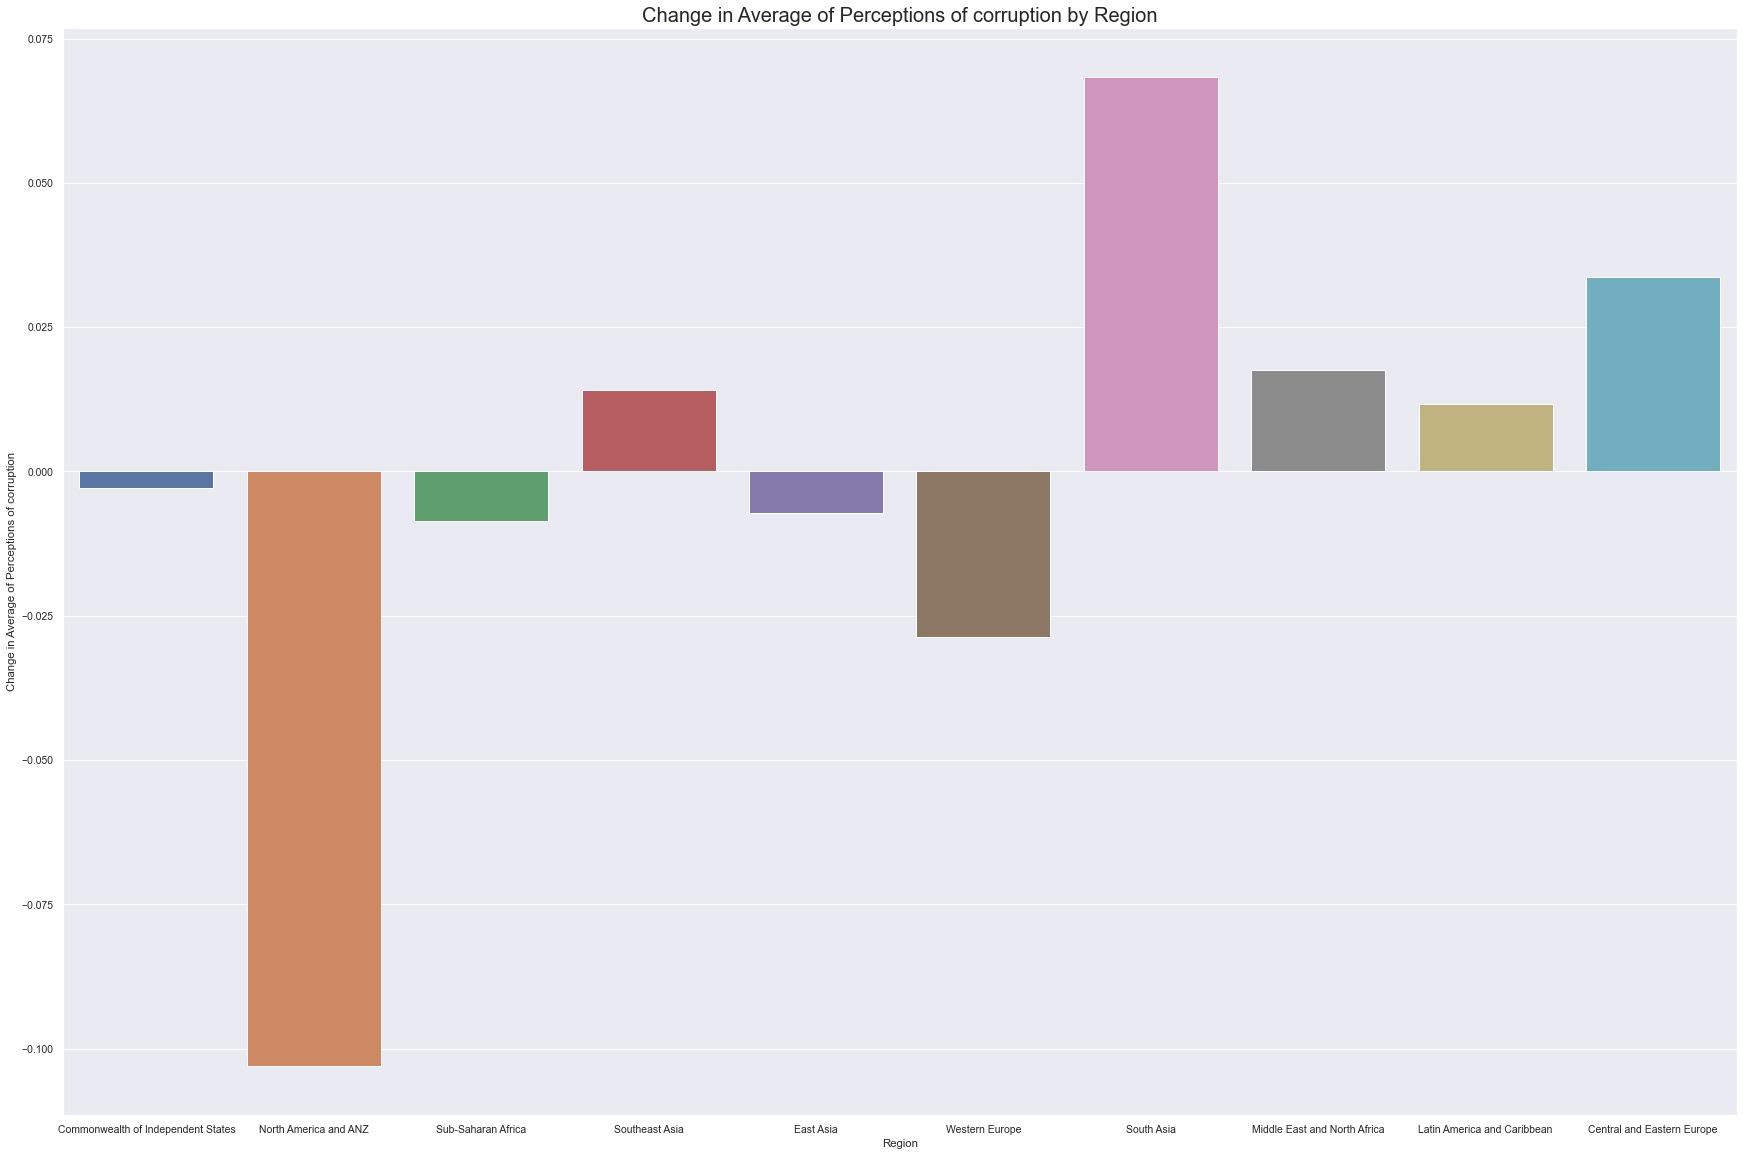

In [1514]:
barPlot2(changeInColumnByYear(df2021,df2020,'Perceptions of corruption'),'Perceptions of corruption')

In [1515]:
df2019 = pd.read_csv('../../data/raw/world-happiness-report-2019.csv')
df2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [1516]:
lst2020 = df2020['Country name'].to_list()
lst2019 = df2019['Country or region'].to_list()

newLst = []
notInLst = []
for i in lst2020:
    if i in lst2019:
        newLst.append(lst2019.index(i))
    elif i not in lst2019:
        notInLst.append(i)
       
df2019 = df2019.iloc[newLst]

lst = df2019['Country or region'].to_list()
newLst = []

for i in lst:
    newLst.append(lst2020.index(i))
len(newLst)


147

In [1517]:
import numpy as np
def grabMaxIndex(df, amountOfMax):
    lstOfIndex = []
    lst = list(df['Ladder score difference (2021 subtracted by 2020)'])
    
    for i in range(amountOfMax,0,-1):
        lstOfIndex.append(lst.index(max(lst)))
        lst[lst.index(max(lst))] = -100
    
    return lstOfIndex
    
    
    
    

In [1518]:
lstOfIndex = grabMaxIndex(df,3)
lstOfIndex

[23, 24, 113]

In [1519]:
def getDifferenceForEachMax(df1, df2, column,lst):
    dfT1 = df1[['Country name',column]]
    dfT2 = df2[['Country name',column]]
    newLst = []
    for i in lst:
        newLst.append(dfT1.loc[i,column] - dfT2.loc[i,column])
    return newLst

In [1520]:
def getDF(df1, df2, column, lst):
    dfT = df1['Country name']
    dfT = dfT.to_frame()
    dfT = dfT.loc[lst]
    dfT.insert(1,'Difference of '+column, getDifferenceForEachMax(df1, df2, column,lst) )
    return dfT

In [1521]:
getDF(df2021,df2020,'Ladder score',lstOfIndex)

,Country name,Difference of Ladder score
23,Taiwan Province of China,0.1190
24,United Arab Emirates,0.1056
113,Cambodia,0.1007


In [1522]:
def plotByDf(df1, df2, column, lst):
     sns.barplot(data=getDF(df2021,df2020,column,lst), x='Country name',y='Difference of '+column).set_title('Difference of '+column+' by Country',fontsize=20)

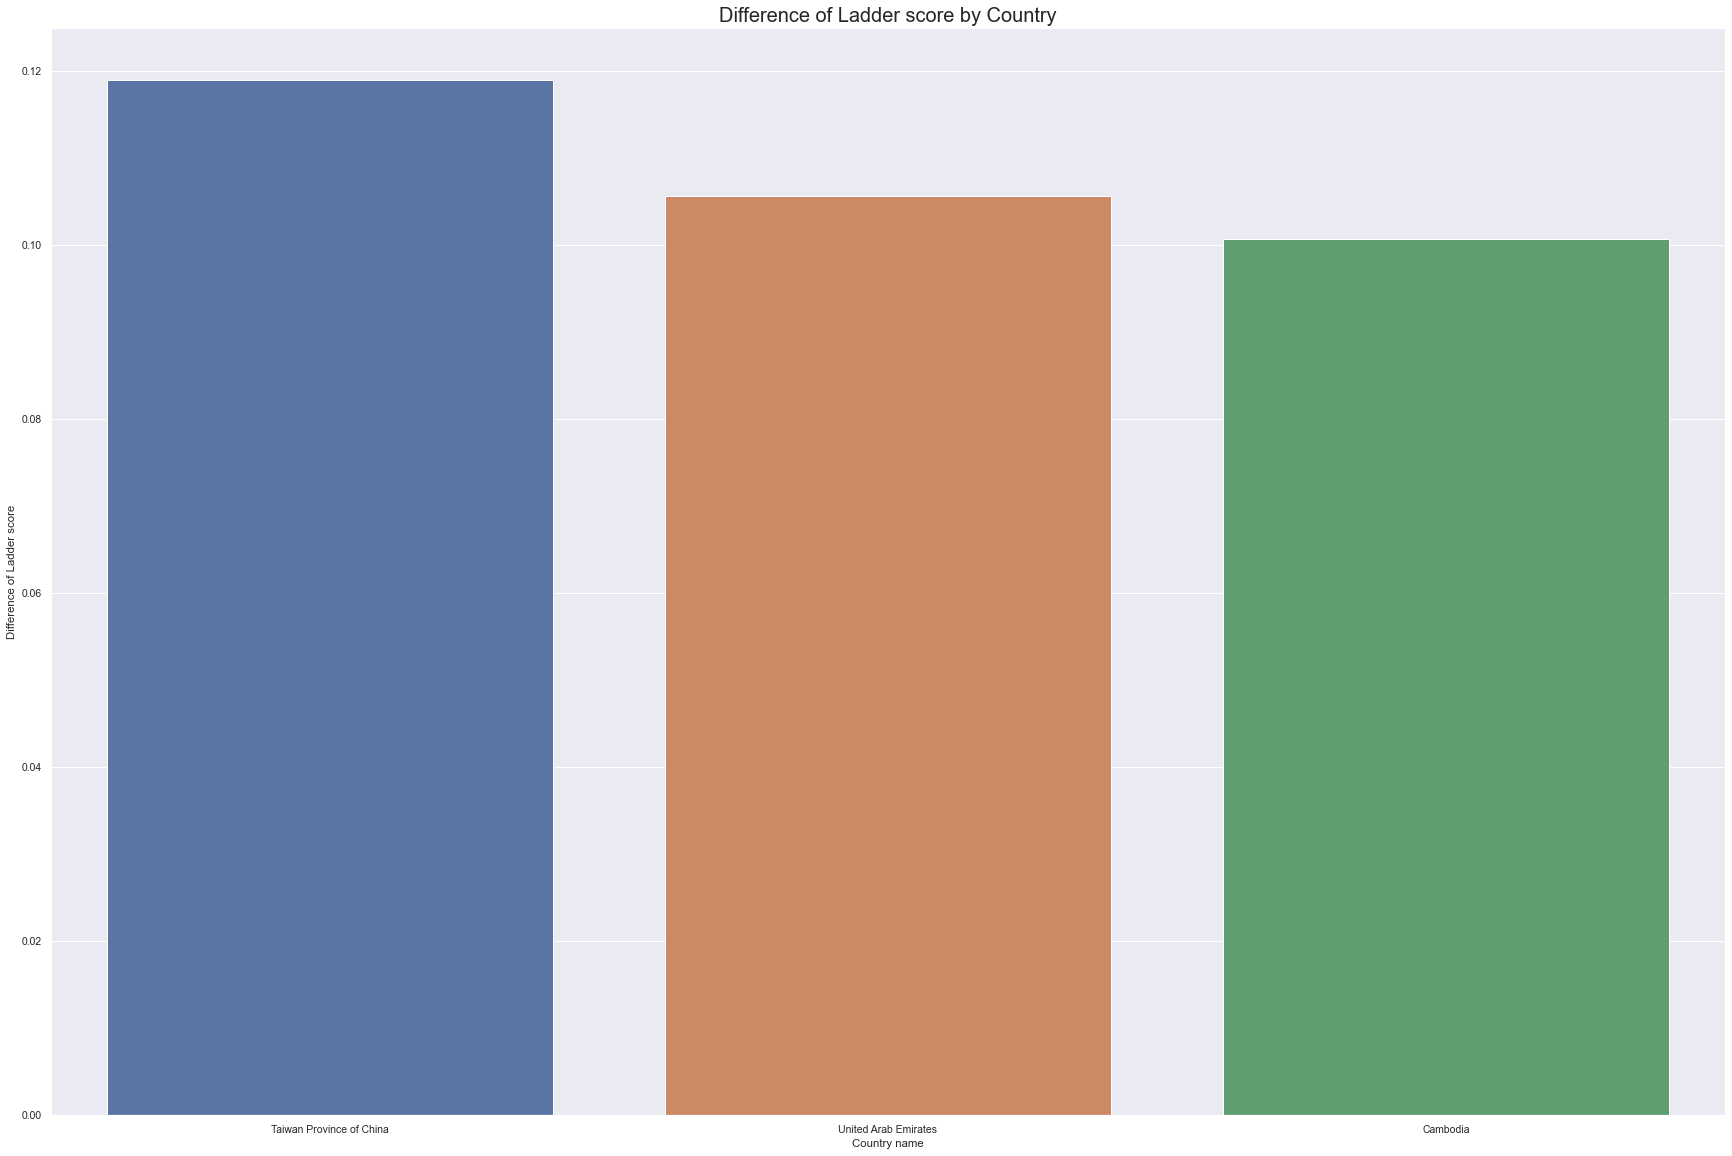

In [1523]:
plotByDf(df2021,df2020,'Ladder score',lstOfIndex)

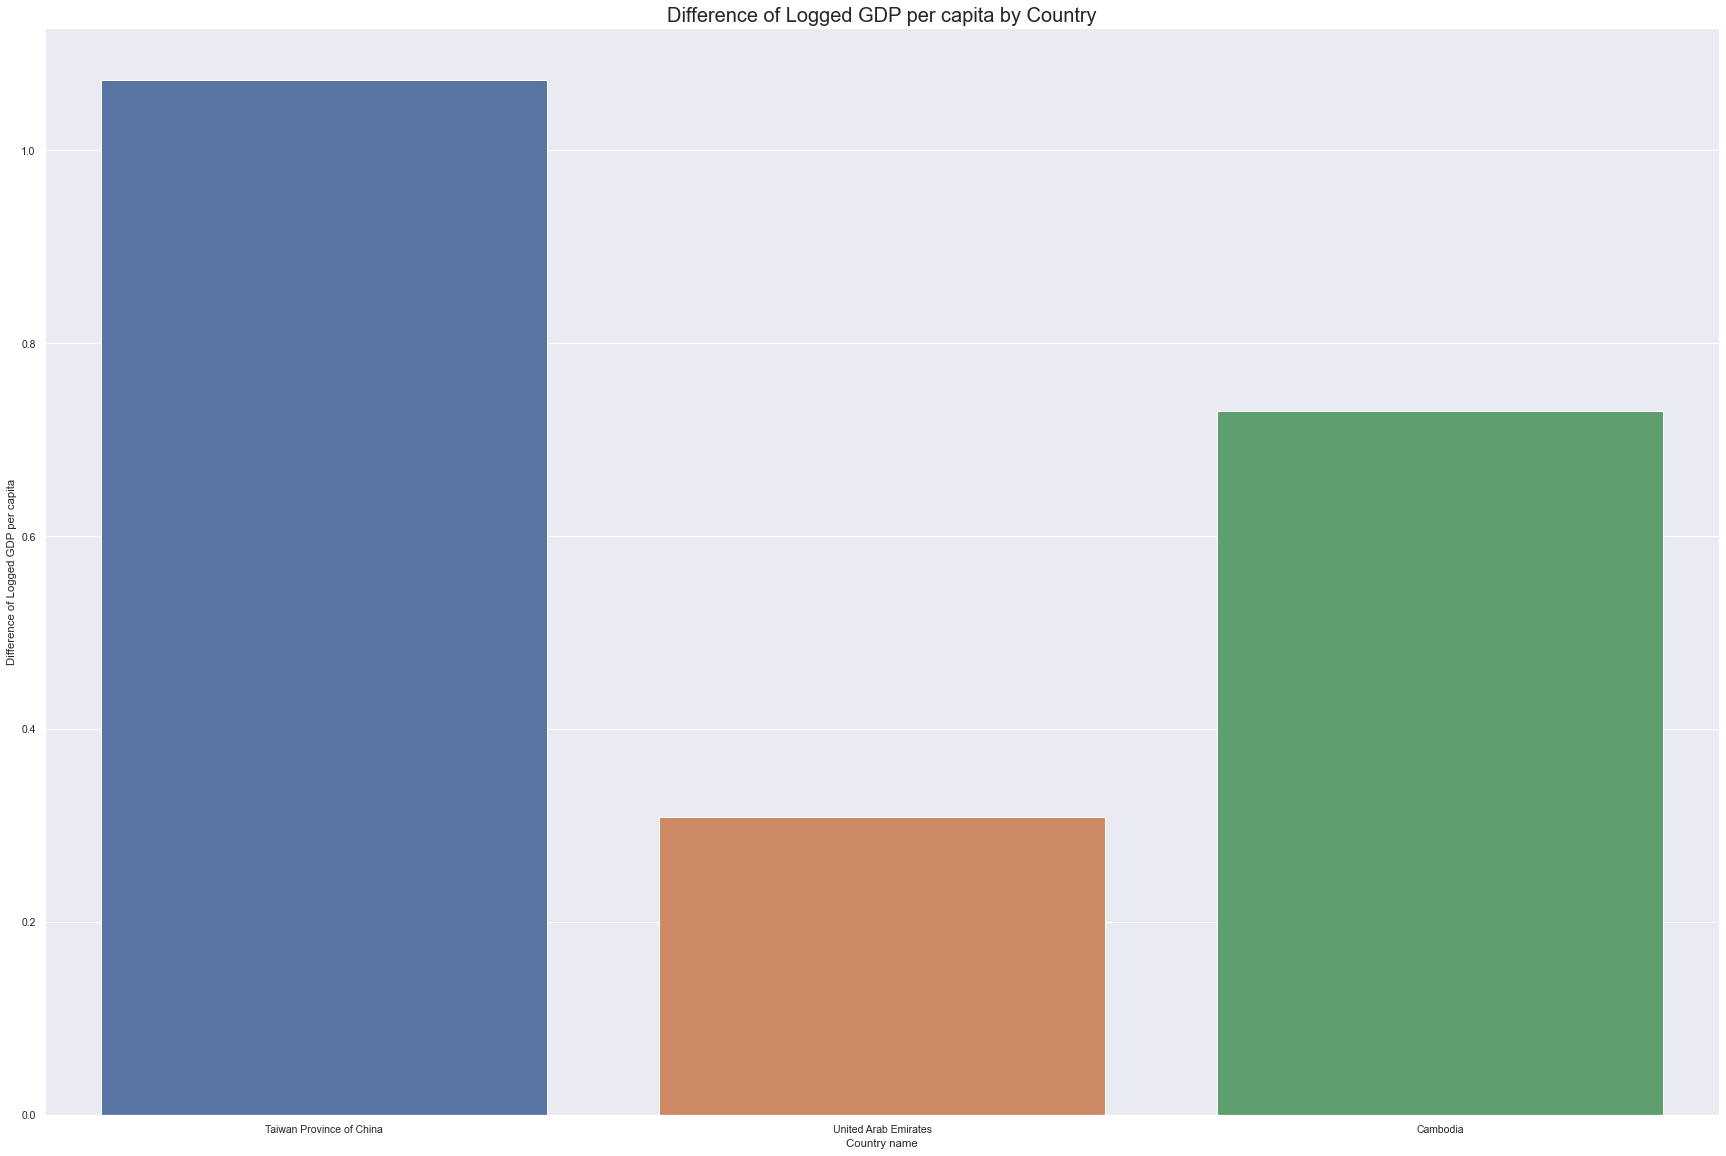

In [1524]:
plotByDf(df2021,df2020,'Logged GDP per capita',lstOfIndex)

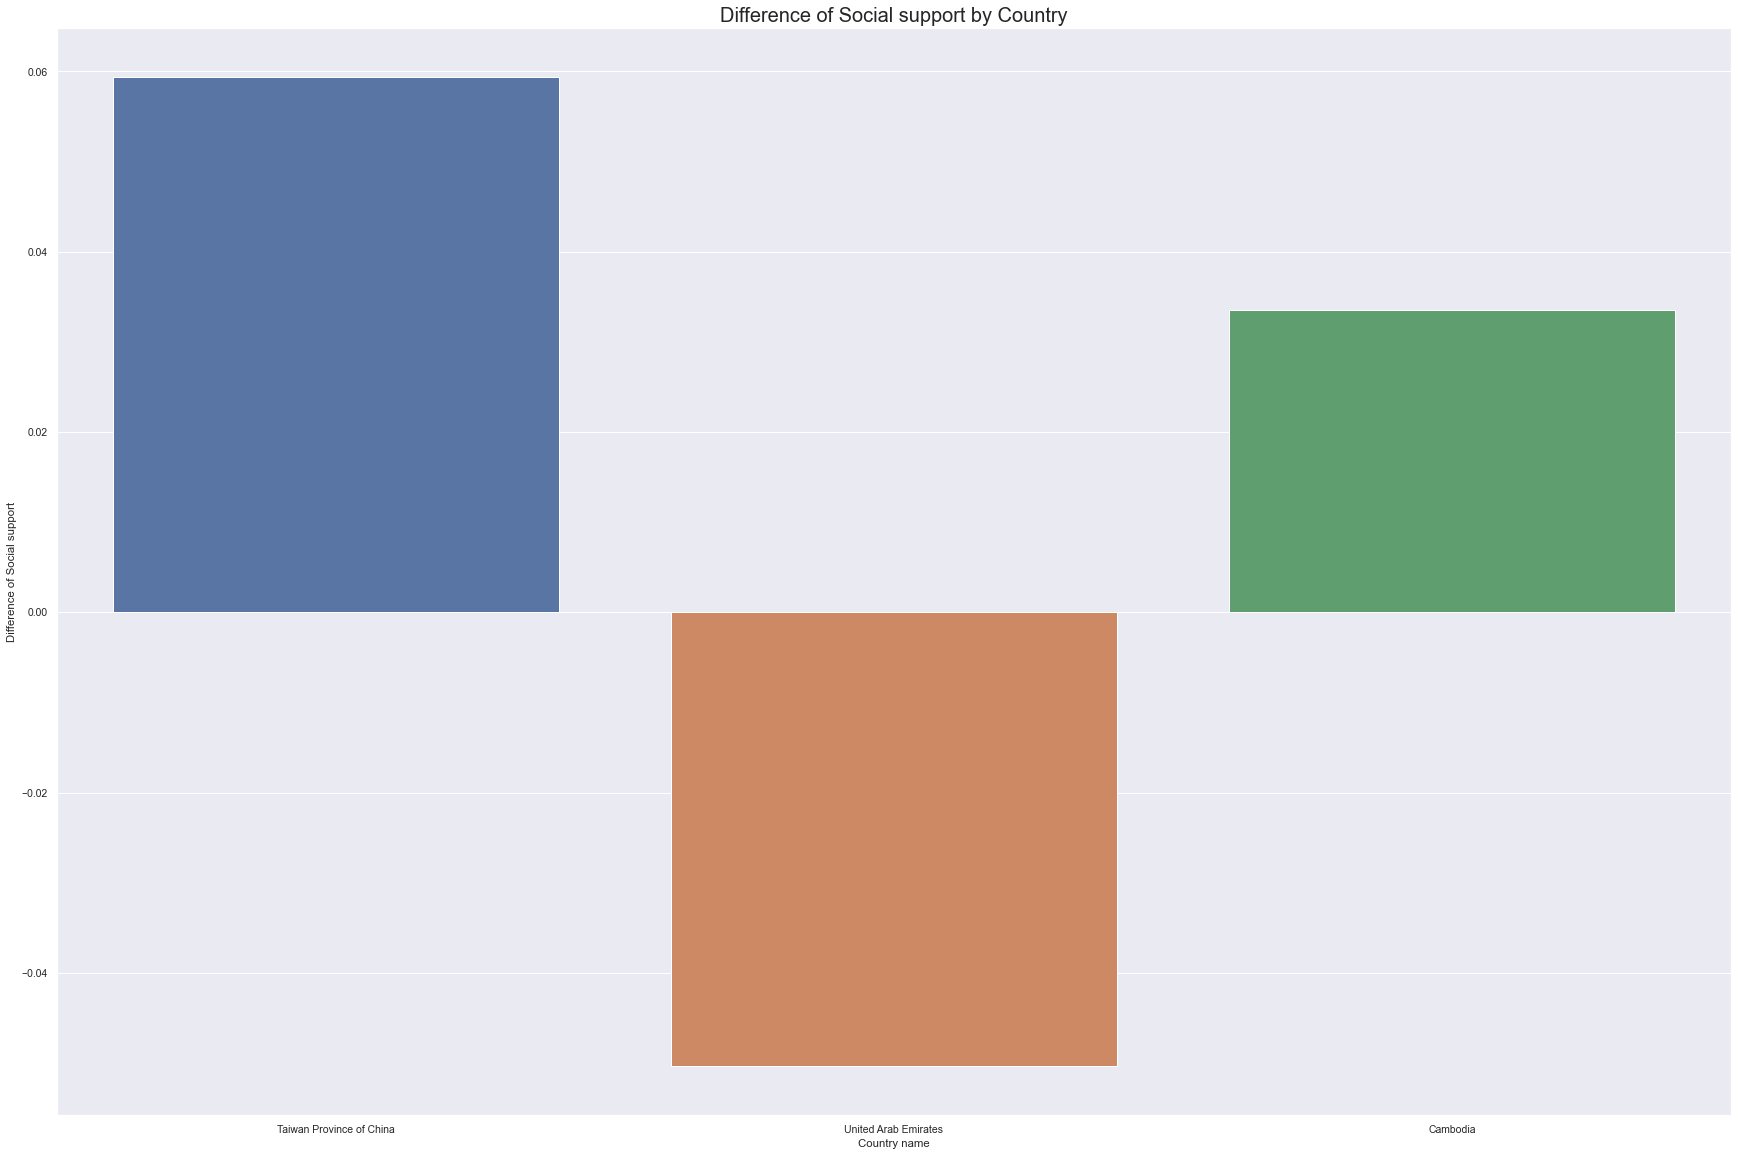

In [1525]:
plotByDf(df2021,df2020,'Social support',lstOfIndex)

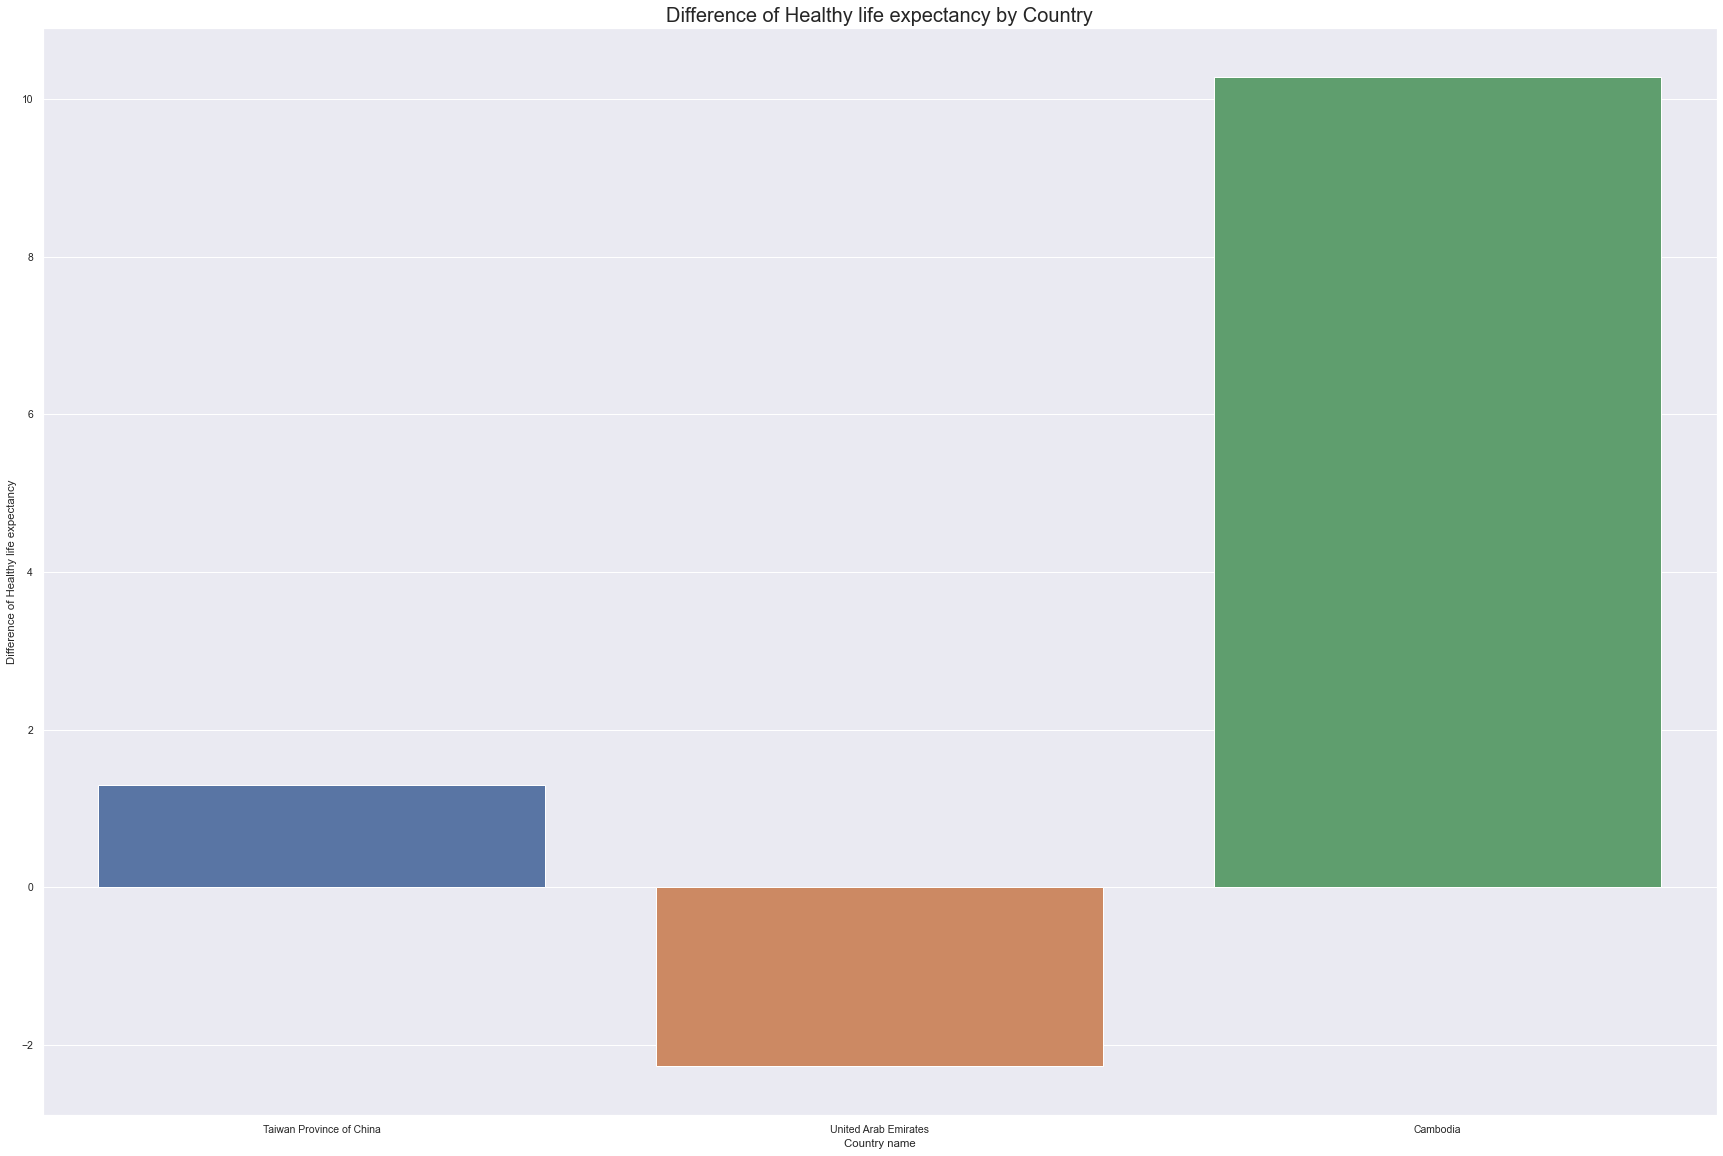

In [1526]:
plotByDf(df2021,df2020,'Healthy life expectancy',lstOfIndex)

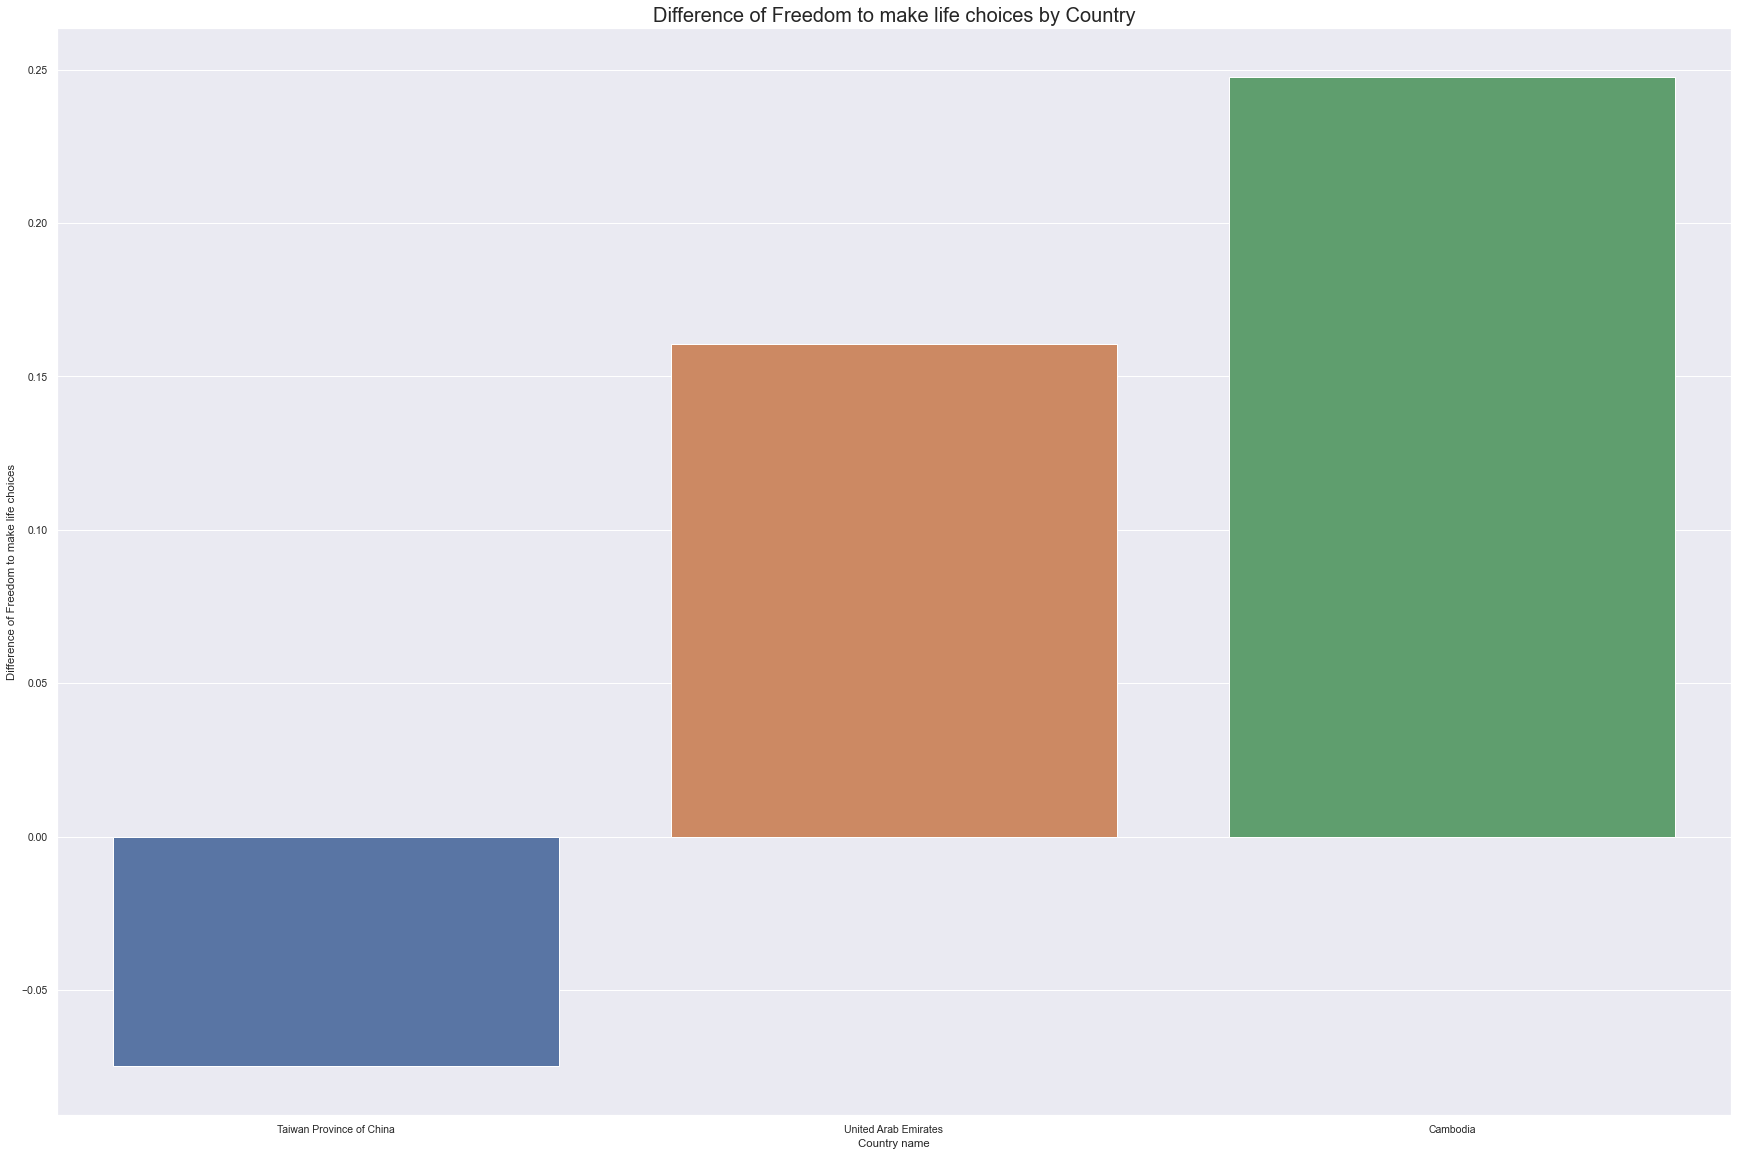

In [1527]:
plotByDf(df2021,df2020,'Freedom to make life choices',lstOfIndex)

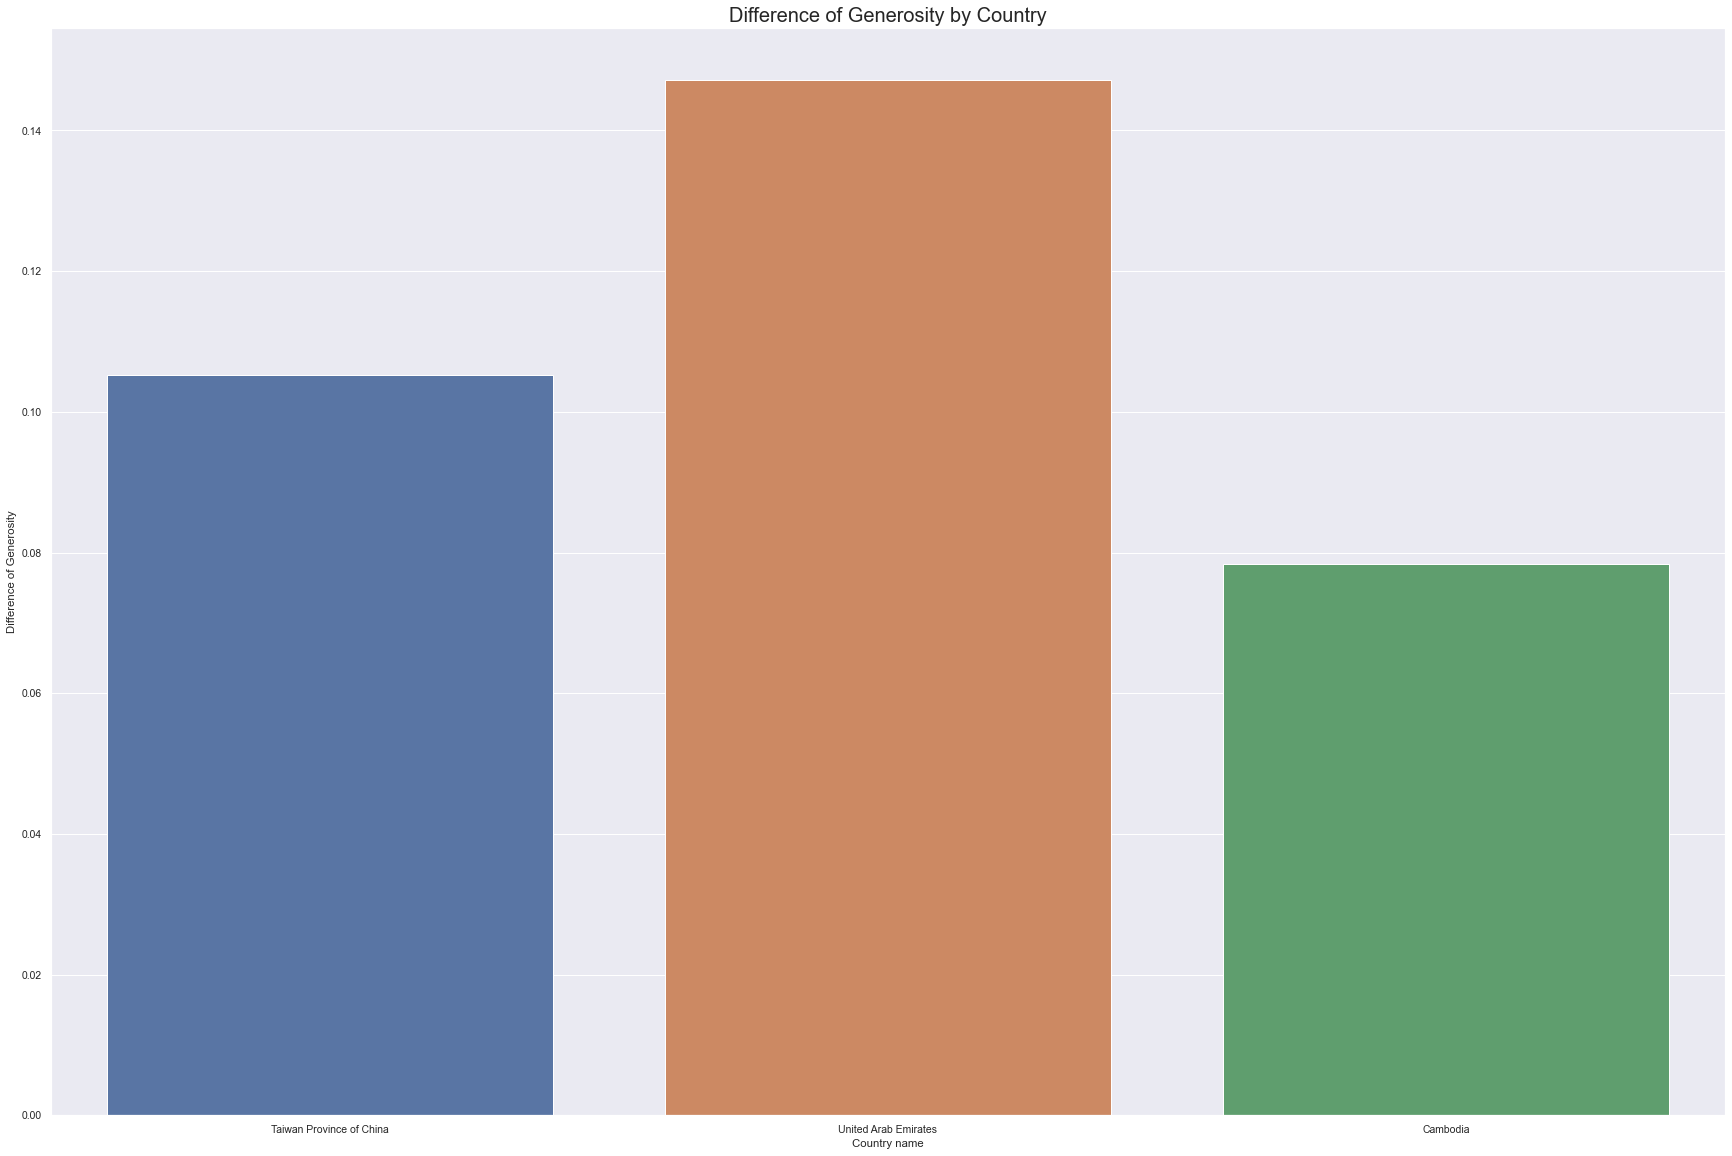

In [1528]:
plotByDf(df2021,df2020,'Generosity',lstOfIndex)

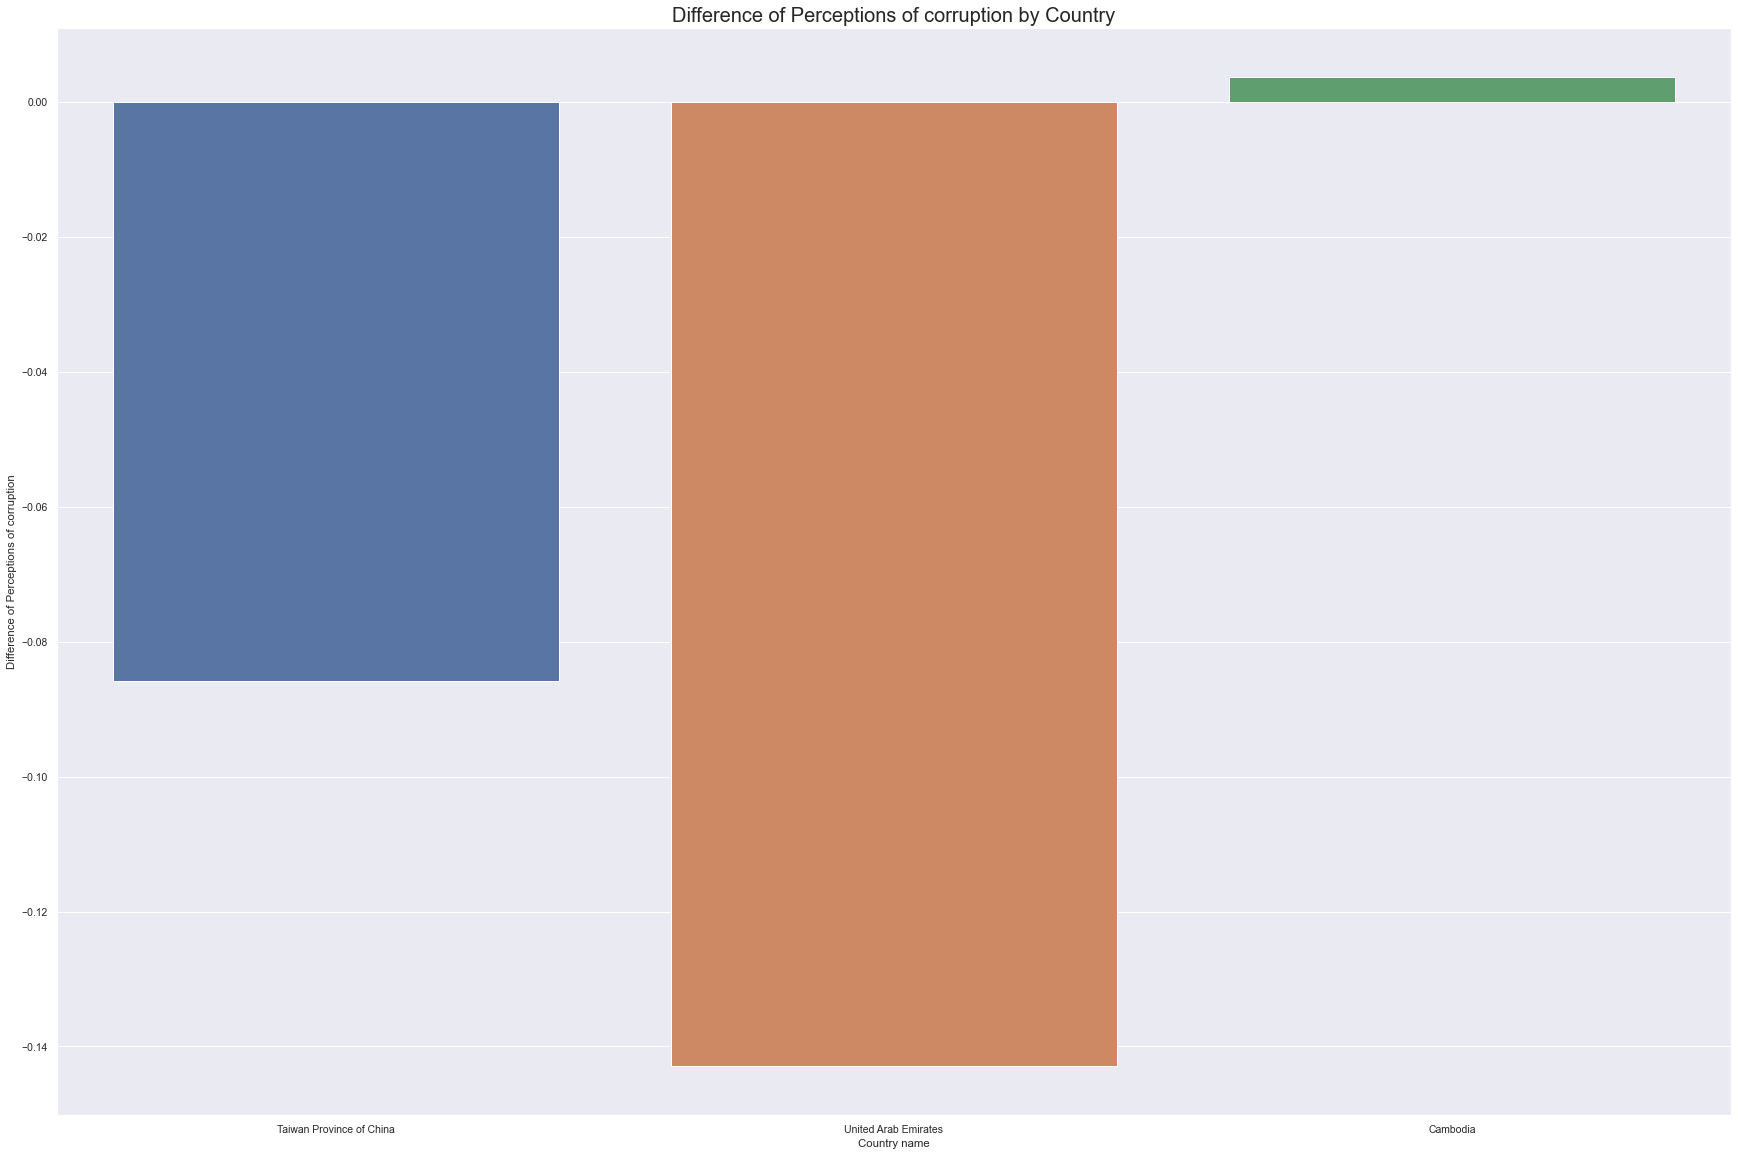

In [1529]:
plotByDf(df2021,df2020,'Perceptions of corruption',lstOfIndex)